<div style="color:white;display:fill;border-radius:8px;
            background-color:#2a2a2ad9;font-size:190%;
            font-family:Segoe UI;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>MACHINE LEARNIG PREDICTION & COHORT ANALYSIS - HOTEL IN LISBON </b></p>
</div>. 

**A cohort** is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts. Cohorts are used in medicine, psychology, econometrics, ecology and many other areas to perform a cross-section (compare difference across subjects) at intervals through time.

**Types of cohorts**:

* **Time Cohorts** are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.
* **Behaviour cohorts** are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.
* **Size cohorts** refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.

# <b>1 <span style='color:#DC33FF'>|</span> Import Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os
import openpyxl
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from pyod.models.knn import KNN
from sklearn.neighbors import LocalOutlierFactor
import scipy.stats as stats
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


# <b>2 <span style='color:#DC33FF'>|</span> Reading Data</b>

In [2]:
df = pd.read_excel("HotelCustomersDataset.xlsx")

# <b>3 <span style='color:#DC33FF'>|</span> Explore Data & Data Preprocessing</b>

It is displayed the first 10 rows of dataset.

In [3]:
df.head(10)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,49.0,1095,0x1DD6DA89DEECA1841ABD572562982EE905566F4469AC...,0xAB9CEF189D944E0607A55E48023A3A5290722C0DFC1B...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,32.0,1095,0x5A3A2D6A659769FCA243FC2A97644D27A75FB9AA4DF3...,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.0,94.0,0,...,0,0,0,0,1,0,0,0,0,0
8,9,FRA,42.0,1095,0xD9D899DA4FB0CF23FDF902C1B237A30AE854FFBC79FC...,0xCCDDA9F399058BA00C9A53C107F986F1B5CECD1CEAEF...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
9,10,IRL,25.0,1095,0x801B08C30D1A38E502BFC39A7914A2FF786C353FE409...,0x0659443C9197CB0C2B728362C9837E67A72B3BA7D579...,96,174.0,69.0,0,...,0,0,0,0,0,0,0,0,0,0


It is displayed all the rows of dataset.

In [4]:
display(df)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,0,0,1,0,0,0,0


The dataset contains 83590 instances (customers) and 31 variables. 

In [5]:
df.shape

(83590, 31)

The different variables are the following ones;

In [6]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

There are a total of 80 duplicated instances.

In [7]:
df.duplicated(subset=['Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom']).sum()

80

In [8]:
df[df.duplicated(subset=['Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'], keep= False)]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
593,594,ROU,37.0,1075,0x00B7D9E92D1A0D60006C8278FFB8C9D5A1FB81A004EC...,0xBB7DBCA870263C18AF0CD7FF4C49BD2F0C103C240E8E...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
594,595,ROU,37.0,1075,0x00B7D9E92D1A0D60006C8278FFB8C9D5A1FB81A004EC...,0xBB7DBCA870263C18AF0CD7FF4C49BD2F0C103C240E8E...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
701,702,BRA,25.0,1069,0xE1A92019A5F167A9A1133097E9F519FDB33C72C90BED...,0xF6F1D07DD1EE8DC07C414A82E15CF32F45711C46ED8A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
702,703,BRA,25.0,1069,0xE1A92019A5F167A9A1133097E9F519FDB33C72C90BED...,0xF6F1D07DD1EE8DC07C414A82E15CF32F45711C46ED8A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1110,1111,PRT,NaN,1055,0x73B01C4601EF3C6052F956A5A3671899A57A09B22EA5...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81374,81375,FRA,23.0,29,0x2214B507D054BFC9F086F3CE00565A3CAE3EB5F8735E...,0x6CDFF4D8701122B728AE85CE7C7AB51DE811D4772F01...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
81380,81381,FRA,23.0,29,0x2214B507D054BFC9F086F3CE00565A3CAE3EB5F8735E...,0x6CDFF4D8701122B728AE85CE7C7AB51DE811D4772F01...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
82780,82781,PRT,NaN,8,0x7403CAD728971FE539067723A660F3647120118D3EB2...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
82781,82782,PRT,NaN,8,0x7403CAD728971FE539067723A660F3647120118D3EB2...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


As there are 80 duplicated instances with matching data in all categories, we will remove them because they do not provide extra information and they are redundant records.

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(83590, 31)

I will check if there are nulls.

In [11]:
df.isna().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

Check which percentages are null over the totality of the data.

In [12]:
100*df.isna().sum()/df.shape[0]

ID                      0.000000
Nationality             0.000000
Age                     4.520876
DaysSinceCreation       0.000000
NameHash                0.000000
DocIDHash               0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoo

<AxesSubplot: >

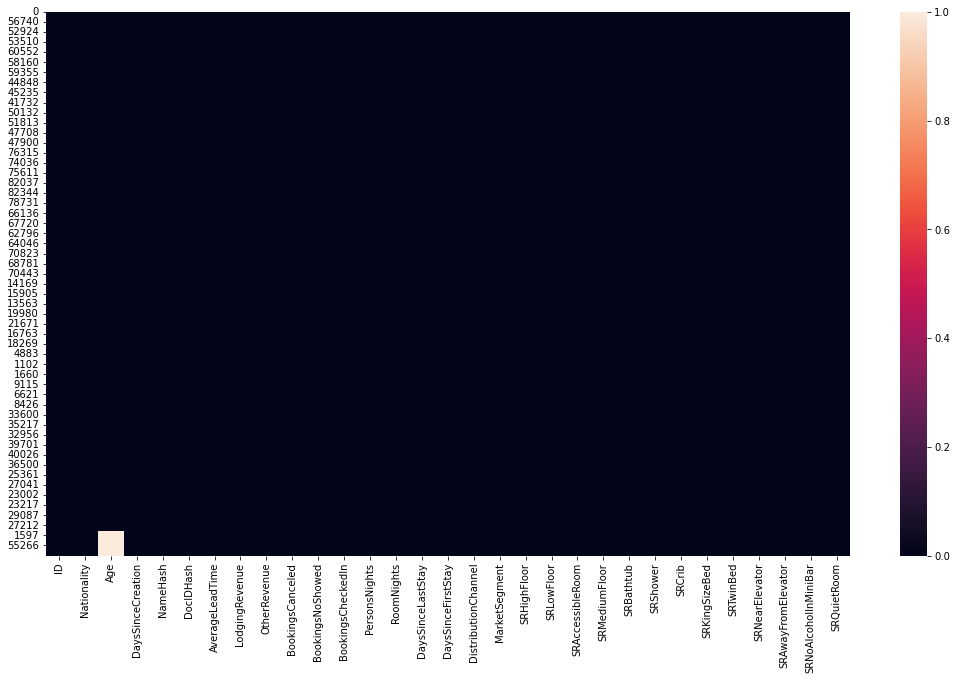

In [13]:
plt.figure(figsize = (18,10))
sns.heatmap(df.isnull().sort_values(by="Age"))

In [14]:
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As the percentage of nulls is 4.5% over the total data, I will remove them, because it will not affect our data and to our analysis.

Besides, I checked that in the variable **"Age"**, minimum age is -11 years old. Definition: Customer's age (in years) at the last day of the extraction period. So, I will proceed to eliminate not only the nulls registers but also those whose value is negative.

In [15]:
df=df.dropna(subset=['Age'])

In [16]:
df.isna().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [17]:
df = df[df['Age'] > 0]

In [18]:
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,...,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000
mean,42316.986684,45.433143,446.583847,66.823904,302.323415,67.989468,0.001843,0.000577,0.793334,4.700973,...,0.000878,0.002922,0.001781,0.013066,0.357232,0.143507,0.000351,0.003574,0.000125,0.090944
std,24005.767617,16.527807,310.560050,87.983900,368.080128,112.665538,0.065937,0.028323,0.690439,4.587553,...,0.029614,0.053973,0.042159,0.113556,0.479187,0.350592,0.018734,0.059673,0.011197,0.287532
min,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21681.750000,34.000000,174.000000,0.000000,64.800000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42369.500000,46.000000,385.000000,30.000000,236.000000,40.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63173.250000,57.000000,703.000000,104.000000,407.425000,88.500000,0.000000,0.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


On the other hand, there is another inconsistent data. The minimum **"AvergagedLeadTime"** is -1, so it has not sense for this variable. Definition: The average number of days elapsed between the customer's booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customer.

We will proceed to eliminate those negative registers.

In [19]:
df = df[df['AverageLeadTime'] >= 0] 

In [20]:
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,...,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000
mean,42315.228033,45.432978,446.608091,66.831559,302.339996,67.996627,0.001843,0.000577,0.793311,4.701240,...,0.000878,0.002922,0.001781,0.013067,0.357273,0.143524,0.000351,0.003574,0.000125,0.090955
std,24006.233104,16.527981,310.566075,87.985915,368.097088,112.669856,0.065940,0.028324,0.690474,4.587737,...,0.029615,0.053976,0.042161,0.113562,0.479199,0.350608,0.018735,0.059676,0.011198,0.287546
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21679.500000,34.000000,174.000000,0.000000,64.730000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42366.000000,46.000000,385.000000,30.000000,236.000000,40.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63173.500000,57.000000,703.000000,104.000000,407.500000,88.500000,0.000000,0.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


I sort the table by DaysSinceCreation.

In [21]:
df.groupby("DaysSinceCreation", group_keys=True).apply(lambda x: x)

ID Nationality   Age  DaysSinceCreation  \
DaysSinceCreation                                                     
0                 83493  83494         FIN  47.0                  0   
                  83494  83495         FIN  13.0                  0   
                  83495  83496         FIN  47.0                  0   
                  83496  83497         FIN  11.0                  0   
                  83497  83498         GBR  42.0                  0   
...                        ...         ...   ...                ...   
1095              64        65         HUN  59.0               1095   
                  66        67         FRA  50.0               1095   
                  67        68         FRA  13.0               1095   
                  68        69         FRA  51.0               1095   
                  70        71         ESP  61.0               1095   

                                                                  NameHash  \
DaysSinceCreation                                                            
0                 83493  0x977AE7635814826F82B7B367D6B9431CB172D979FE4F...   
                  83494  0xFF59F38F7BFF912247CCFB260B37518C6E0891B75B55...   
                  83495  0x827CB636500C3C1E15773FB165727795167C7334E8AE...   
                  83496  0x6AA1FC11FF74B8A64D2118ADFF390FC3F96FEED9887B...   
                  83497  0xC8DBD7E318CD24262BD97255CE3A80AF7F8931E7D153...   
...                                                                    ...   
1095              64     0xF32C2F76E8A7FE05361018575CAFBD7027A9B97DD2EA...   
                  66     0x37F6BF08A267DA65C31063A35172E33D0529FDA0D00C...   
                  67     0x0A5D1532BFB2FDCBF7861FCC86D0F57199A07BE246E5...   
                  68     0x1EA6E44D4AA85EF9B492CFF22E1717FACC9D7D51B2F7...   
                  70     0x4ED8F3499BBB0FBDE485243DB4DDBAF57B961D08CFD5...   

                                                                 DocIDHash  \
DaysSinceCreation                                                            
0                 83493  0xC61635C02837D1E3BA947B74C42C3950D40396FA8CD6...   
                  83494  0xA6738E9DC66BF3947AF160D86602E791AFC1867ECB9B...   
                  83495  0x55A4CA8F7473E6C2C3EBA0E866ABE6DBD9B2C4FFE62B...   
                  83496  0x09082291A18298C5C79B6F8F0BCF34226058DB1B4890...   
                  83497  0xD9E18B28871CF90297C39CC0945F46585481753E354D...   
...                                                                    ...   
1095              64     0x57BBBD7FA724ED22BADFB8EA5BC2A337A5BF6F390B89...   
                  66     0x1EA52AAF7DFC02828B9661DCB85BBB7564138EFF49EA...   
                  67     0x8BDF50DFBCB267507E268A26F639952FBAFEBC436B06...   
                  68     0xFF27534A489F868834CE45A2B7A82D59BF7DFC389EB9...   
                  70     0xFFBC8DC913F83F0471D31E6B1FB1CE4B3D5F94E7E9F8...   

                         AverageLeadTime  LodgingRevenue  OtherRevenue  \
DaysSinceCreation                                                        
0                 83493                8          1022.0        100.00   
                  83494                0             0.0          0.00   
                  83495                0             0.0          0.00   
                  83496                0             0.0          0.00   
                  83497                0           349.6         56.25   
...                                  ...             ...           ...   
1095              64                   0             0.0          0.00   
                  66                  96           300.0        284.97   
                  67                   0             0.0          0.00   
                  68                   0             0.0          0.00   
                  70                   0             0.0          0.00   

                         BookingsCanceled  ...  SRMediumFloor  SRBathtub  \
DaysSinceCreation                  

In [22]:
df.nunique()

ID                      79743
Nationality               187
Age                        98
DaysSinceCreation        1095
NameHash                77308
DocIDHash               76693
AverageLeadTime           416
LodgingRevenue          10028
OtherRevenue             4393
BookingsCanceled            6
BookingsNoShowed            4
BookingsCheckedIn          28
PersonsNights              54
RoomNights                 45
DaysSinceLastStay        1105
DaysSinceFirstStay       1106
DistributionChannel         4
MarketSegment               7
SRHighFloor                 2
SRLowFloor                  2
SRAccessibleRoom            2
SRMediumFloor               2
SRBathtub                   2
SRShower                    2
SRCrib                      2
SRKingSizeBed               2
SRTwinBed                   2
SRNearElevator              2
SRAwayFromElevator          2
SRNoAlcoholInMiniBar        2
SRQuietRoom                 2
dtype: int64

We delete "ID", "NameHash" y "DocIDHash" features, because they are not important to the study of ML model.

In [23]:
df = df.drop(['ID', 'NameHash', 'DocIDHash'], axis=1)

In [24]:
df.head(15)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
6,JPN,49.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,FRA,32.0,1095,38,535.0,94.0,0,0,1,10,...,0,0,0,0,1,0,0,0,0,0
8,FRA,42.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,IRL,25.0,1095,96,174.0,69.0,0,0,1,6,...,0,0,0,0,0,0,0,0,0,0
10,IRL,27.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.dtypes

Nationality              object
Age                     float64
DaysSinceCreation         int64
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

There are 187 source markets, with the top 20 markets are included more than 90% of the instances (customers). In order to realize a one hot encoder it is necessary to reduce the dimensionality of the database with the less important markets.

In [26]:
df['Nationality'].nunique()

187

In [27]:
top_20_markets = df['Nationality'].value_counts().head(20)
names = top_20_markets.keys()

In [28]:
top_20_markets

FRA    12409
DEU    10224
GBR     8648
PRT     7813
ESP     4898
USA     3426
ITA     3363
BEL     3118
BRA     2896
NLD     2723
CHE     2106
IRL     1996
CAN     1523
AUT     1488
SWE     1231
ISR      900
CHN      890
NOR      794
POL      759
AUS      723
Name: Nationality, dtype: int64

In [29]:
names

Index(['FRA', 'DEU', 'GBR', 'PRT', 'ESP', 'USA', 'ITA', 'BEL', 'BRA', 'NLD',
       'CHE', 'IRL', 'CAN', 'AUT', 'SWE', 'ISR', 'CHN', 'NOR', 'POL', 'AUS'],
      dtype='object')

In [30]:
top_20_markets.sum()

71928

In [31]:
df['Nationality'].value_counts().sum()

79743

In [32]:
perc_top_20_markets = (top_20_markets.sum() / df['Nationality'].value_counts().sum())*100

In [33]:
perc_top_20_markets 

90.19976675068658

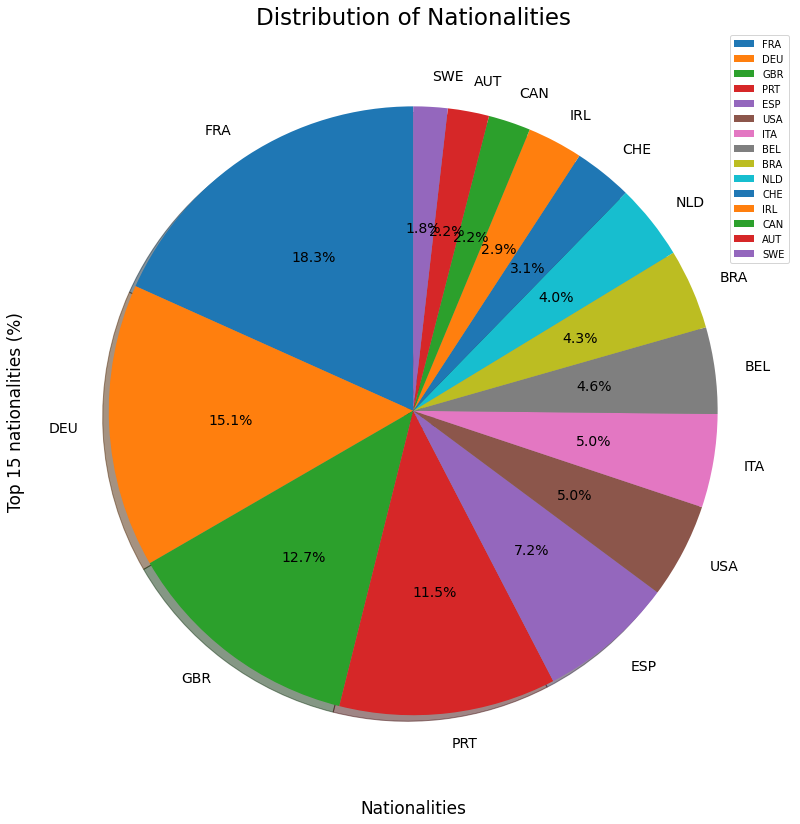

In [34]:
plt.figure(figsize=(23, 14))
top_15 = df["Nationality"].value_counts().nlargest(15)
plt.pie(top_15, labels=top_15.index, shadow=True, startangle=90, autopct="%.1f%%", textprops={'fontsize': 14} )
plt.legend(top_15.index, fontsize=10)
plt.title('Distribution of Nationalities', fontsize=23)
plt.xlabel('Nationalities', fontsize=17)
plt.ylabel('Top 15 nationalities (%)', fontsize=17)
plt.show()

In [35]:
num_of_countries = df['Nationality'].nunique()
print('The number of source markets before preprocessing is %s' %num_of_countries)

The number of source markets before preprocessing is 187


In [36]:
df.Nationality

0        PRT
2        DEU
3        FRA
4        FRA
5        JPN
        ... 
83585    ITA
83586    IRL
83587    IRL
83588    IRL
83589    IRL
Name: Nationality, Length: 79743, dtype: object

In [37]:
df = df[df['Age'] < 100]
df

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83586,IRL,47.0,0,109,327.1,277.5,0,0,1,6,...,0,0,0,0,1,0,0,0,0,0
83587,IRL,53.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83588,IRL,85.0,0,109,981.3,9.0,0,0,1,6,...,0,0,0,0,0,1,0,0,0,0


In [38]:
names_top20 = df.groupby('Nationality').count().sort_values(by = 'Age', ascending = False)
top_20_source_market = list(names_top20[names_top20['Age'] < 724]['Age'].keys())

for i in top_20_source_market:
    df['Nationality'] = df['Nationality'].str.replace(i,'')
    
print('The number of top source markets after deleting those with less than 724 instances is: %s' %df['Nationality'].nunique())

The number of top source markets after deleting those with less than 724 instances is: 20


We create new features, by combining the existing features given in the dataset;

* **Total Revenue** It is the addition of LodingRevenue and OtherRevenue.
* **ADR (Average Daily Rate)** A hotel's average daily rate (ADR) is the average price guests pay for rooms. It can be measured on a given night or over a specific period of time, such as a month or a year.
* **ALOS (Average length of stay)** refers to the number of nights guests stay on average over a given period of time, usually a month or a year.

In [39]:
df['TotalRevenue'] = df['LodgingRevenue'] + df['OtherRevenue']

In [40]:
df.groupby('TotalRevenue')['Nationality'].unique().str[0]

TotalRevenue
0.00        DEU
1.00        PRT
2.00        PRT
2.50        FRA
3.00        ESP
           ... 
9576.80     GBR
10324.50       
10982.40    USA
11081.15    PRT
11930.66    DEU
Name: Nationality, Length: 16374, dtype: object

In [41]:
df["ADR"] = df["LodgingRevenue"]/df["RoomNights"]

In [42]:
df["ADR"]

0         74.200000
2               NaN
3         48.000000
4               NaN
5        115.000000
            ...    
83585           NaN
83586    109.033333
83587           NaN
83588    327.100000
83589           NaN
Name: ADR, Length: 79735, dtype: float64

In [43]:
df["ALOS"]= df["RoomNights"]/df["BookingsCheckedIn"]

In [44]:
df["ALOS"]

0        1.666667
2             NaN
3        5.000000
4             NaN
5        2.000000
           ...   
83585         NaN
83586    3.000000
83587         NaN
83588    3.000000
83589         NaN
Name: ALOS, Length: 79735, dtype: float64

In [45]:
display(df)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,ADR,ALOS
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,476.3,74.200000,1.666667
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,NaN,NaN
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,300.0,48.000000,5.000000
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,NaN,NaN
5,,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,254.0,115.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,NaN,NaN
83586,IRL,47.0,0,109,327.1,277.5,0,0,1,6,...,0,1,0,0,0,0,0,604.6,109.033333,3.000000
83587,IRL,53.0,0,0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0.0,NaN,NaN
83588,IRL,85.0,0,109,981.3,9.0,0,0,1,6,...,0,0,1,0,0,0,0,990.3,327.100000,3.000000


In [46]:
df.isna().sum()

Nationality                 0
Age                         0
DaysSinceCreation           0
AverageLeadTime             0
LodgingRevenue              0
OtherRevenue                0
BookingsCanceled            0
BookingsNoShowed            0
BookingsCheckedIn           0
PersonsNights               0
RoomNights                  0
DaysSinceLastStay           0
DaysSinceFirstStay          0
DistributionChannel         0
MarketSegment               0
SRHighFloor                 0
SRLowFloor                  0
SRAccessibleRoom            0
SRMediumFloor               0
SRBathtub                   0
SRShower                    0
SRCrib                      0
SRKingSizeBed               0
SRTwinBed                   0
SRNearElevator              0
SRAwayFromElevator          0
SRNoAlcoholInMiniBar        0
SRQuietRoom                 0
TotalRevenue                0
ADR                     19025
ALOS                    19025
dtype: int64

# <b>4 <span style='color:#DC33FF'>|</span> OneHotEncoding</b>

In this dataset, the categorical characteristics are those corresponding to the "object" types. We extract the list of these features using the select_dtypes method of pandas.

In [47]:
df1=df
cat_features = df1.select_dtypes(include = ["object"]).columns
cat_features

Index(['Nationality', 'DistributionChannel', 'MarketSegment'], dtype='object')

In [48]:
cat_df1 = pd.get_dummies(df1[cat_features], drop_first = True)
cat_df1.head()

,Nationality_AUT,Nationality_BEL,Nationality_BRA,Nationality_CAN,Nationality_CHE,Nationality_CHN,Nationality_DEU,Nationality_ESP,Nationality_FRA,Nationality_GBR,...,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Now, it is sufficient to remove the original features.

In [49]:
df1.drop(cat_features, axis = 1, inplace = True)

And we proceed to concatenate the resulting dataframe with the dataframe we have generated with the "dummies" features:

In [50]:
df1 = pd.concat([df1, cat_df1], axis = 1)

In [51]:
print(df1.columns.tolist())
type(df1.columns.tolist())

['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'TotalRevenue', 'ADR', 'ALOS', 'Nationality_AUT', 'Nationality_BEL', 'Nationality_BRA', 'Nationality_CAN', 'Nationality_CHE', 'Nationality_CHN', 'Nationality_DEU', 'Nationality_ESP', 'Nationality_FRA', 'Nationality_GBR', 'Nationality_IRL', 'Nationality_ISR', 'Nationality_ITA', 'Nationality_NLD', 'Nationality_NOR', 'Nationality_POL', 'Nationality_PRT', 'Nationality_SWE', 'Nationality_USA', 'DistributionChannel_Direct', 'DistributionChannel_Electronic Distribution', 'DistributionChannel_Travel Agent/Operator', 'MarketSegment_Complementary', 'MarketSegment_Corporate', '

list

In [52]:
df1.dtypes

Age                                            float64
DaysSinceCreation                                int64
AverageLeadTime                                  int64
LodgingRevenue                                 float64
OtherRevenue                                   float64
BookingsCanceled                                 int64
BookingsNoShowed                                 int64
BookingsCheckedIn                                int64
PersonsNights                                    int64
RoomNights                                       int64
DaysSinceLastStay                                int64
DaysSinceFirstStay                               int64
SRHighFloor                                      int64
SRLowFloor                                       int64
SRAccessibleRoom                                 int64
SRMediumFloor                                    int64
SRBathtub                                        int64
SRShower                                         int64
SRCrib    

imputer = KNNImputer(n_neighbors=1, weights="distance")
df1 = pd.DataFrame(imputer.fit_transform(df1), columns = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'TotalRevenue', 'ADR', 'ALOS',
       'Nationality_AUT', 'Nationality_BEL', 'Nationality_BRA',
       'Nationality_CAN', 'Nationality_CHE', 'Nationality_CHN',
       'Nationality_DEU', 'Nationality_ESP', 'Nationality_FRA',
       'Nationality_GBR', 'Nationality_IRL', 'Nationality_ISR',
       'Nationality_ITA', 'Nationality_NLD', 'Nationality_NOR',
       'Nationality_POL', 'Nationality_PRT', 'Nationality_SWE',
       'Nationality_USA', 'DistributionChannel_Direct',
       'DistributionChannel_Electronic Distribution',
       'DistributionChannel_Travel Agent/Operator',
       'MarketSegment_Complementary', 'MarketSegment_Corporate',
       'MarketSegment_Direct', 'MarketSegment_Groups', 'MarketSegment_Other',
       'MarketSegment_Travel Agent/Operator'])
df1

In [53]:
imp = SimpleImputer(missing_values=np.nan, strategy ="most_frequent")
imp.fit(df1)
df1 = pd.DataFrame(imp.transform(df1), columns = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'TotalRevenue', 'ADR', 'ALOS',
       'Nationality_AUT', 'Nationality_BEL', 'Nationality_BRA',
       'Nationality_CAN', 'Nationality_CHE', 'Nationality_CHN',
       'Nationality_DEU', 'Nationality_ESP', 'Nationality_FRA',
       'Nationality_GBR', 'Nationality_IRL', 'Nationality_ISR',
       'Nationality_ITA', 'Nationality_NLD', 'Nationality_NOR',
       'Nationality_POL', 'Nationality_PRT', 'Nationality_SWE',
       'Nationality_USA', 'DistributionChannel_Direct',
       'DistributionChannel_Electronic Distribution',
       'DistributionChannel_Travel Agent/Operator',
       'MarketSegment_Complementary', 'MarketSegment_Corporate',
       'MarketSegment_Direct', 'MarketSegment_Groups', 'MarketSegment_Other',
       'MarketSegment_Travel Agent/Operator'])
df1

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.0,150.0,45.0,371.0,105.3,1.0,0.0,3.0,8.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,31.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60.0,1095.0,93.0,240.0,60.0,0.0,0.0,1.0,10.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,51.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54.0,1095.0,58.0,230.0,24.0,0.0,0.0,1.0,4.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79730,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79731,47.0,0.0,109.0,327.1,277.5,0.0,0.0,1.0,6.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79732,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79733,85.0,0.0,109.0,981.3,9.0,0.0,0.0,1.0,6.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
df.isna().sum()

Age                         0
DaysSinceCreation           0
AverageLeadTime             0
LodgingRevenue              0
OtherRevenue                0
BookingsCanceled            0
BookingsNoShowed            0
BookingsCheckedIn           0
PersonsNights               0
RoomNights                  0
DaysSinceLastStay           0
DaysSinceFirstStay          0
SRHighFloor                 0
SRLowFloor                  0
SRAccessibleRoom            0
SRMediumFloor               0
SRBathtub                   0
SRShower                    0
SRCrib                      0
SRKingSizeBed               0
SRTwinBed                   0
SRNearElevator              0
SRAwayFromElevator          0
SRNoAlcoholInMiniBar        0
SRQuietRoom                 0
TotalRevenue                0
ADR                     19025
ALOS                    19025
dtype: int64

# <b>5 <span style='color:#DC33FF'>|</span> Defining X, y</b>

We will define the feature be be predicted, "y" and "X" that is a variable composed of the rest of features.

In [55]:
y = df1["RoomNights"]
X = df1.drop(columns=["RoomNights"])

In [56]:
X

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceLastStay,...,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.0,150.0,45.0,371.0,105.3,1.0,0.0,3.0,8.0,151.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,31.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60.0,1095.0,93.0,240.0,60.0,0.0,0.0,1.0,10.0,1100.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,51.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54.0,1095.0,58.0,230.0,24.0,0.0,0.0,1.0,4.0,1097.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79730,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79731,47.0,0.0,109.0,327.1,277.5,0.0,0.0,1.0,6.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79732,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79733,85.0,0.0,109.0,981.3,9.0,0.0,0.0,1.0,6.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
y

0        5.0
1        0.0
2        5.0
3        0.0
4        2.0
        ... 
79730    0.0
79731    3.0
79732    0.0
79733    3.0
79734    0.0
Name: RoomNights, Length: 79735, dtype: float64

In [58]:
X.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceLastStay,...,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
count,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,...,79735.000000,79735.000000,79735.00000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000
mean,45.426149,446.606296,66.835091,302.355143,67.999133,0.001844,0.000577,0.793328,4.701536,394.464050,...,0.042967,0.141669,0.00617,0.823114,0.005242,0.023992,0.137004,0.111043,0.578893,0.141030
std,16.514700,310.568371,87.986856,368.108869,112.674013,0.065944,0.028326,0.690490,4.587845,343.610236,...,0.202785,0.348713,0.07831,0.381575,0.072215,0.153025,0.343854,0.314187,0.493740,0.348054
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,174.000000,0.000000,64.790000,2.000000,0.000000,0.000000,1.000000,1.000000,25.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,385.000000,30.000000,236.250000,40.000000,0.000000,0.000000,1.000000,4.000000,350.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,57.000000,703.000000,104.000000,407.525000,88.500000,0.000000,0.000000,1.000000,8.000000,678.000000,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,96.000000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,116.000000,1104.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# <b>6 <span style='color:#DC33FF'>|</span> Standarization</b>

We will use the **Standardization**, that is used to rescale features so that they have zero mean and unit variance, which makes the data easier to interpret and analyze. This is achieved by subtracting the mean of each feature from each observation and then dividing by the standard deviation of the feature.

The formula for standardization is:

x_i = (x_i - mean(x)) / std(x)

where:

* **x_i** is the value of the i-th observation for a particular feature.
* **mean(x)** is the mean value of that feature across all observations.
* **std(x)** is the standard deviation of that feature across all observations.

By standardizing the data, each feature has the same scale and variation, which can improve the performance of certain machine learning algorithms, such as those based on distance metrics or gradient descent.

For this reason, we will rescale several features where there is a huge difference between maximum and minimum, such as; "Age", "DaysSinceCreation", "LodgingRevenue", "OtherRevenue", "BookingsNoShowed", "BookingsCheckedIn", "PersonsNights", "DaysSinceLastStay".

In [59]:
sc = StandardScaler()
X_norm = X.copy()
to_normalize = ["Age", "DaysSinceCreation", "LodgingRevenue", "OtherRevenue", "BookingsNoShowed", "BookingsCheckedIn", "PersonsNights", "DaysSinceLastStay"]
X_norm[to_normalize] = sc.fit_transform(X[to_normalize])

In [60]:
X_norm.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceLastStay,...,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0.337511,-0.955049,45.0,0.186481,0.331053,1.0,-0.020367,3.195828,0.718962,-0.708552,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.873539,2.087778,0.0,-0.821379,-0.603507,0.0,-0.020367,-1.148943,-1.024787,-1.150916,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.882483,2.087778,93.0,-0.169394,-0.070994,0.0,-0.020367,0.299314,1.154899,2.053316,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.337511,2.087778,0.0,-0.821379,-0.603507,0.0,-0.020367,-1.148943,-1.024787,-1.150916,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.519168,2.087778,58.0,-0.196560,-0.390502,0.0,-0.020367,0.299314,-0.152913,2.044585,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
X_norm.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceLastStay,...,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
count,7.973500e+04,7.973500e+04,79735.000000,7.973500e+04,7.973500e+04,79735.000000,7.973500e+04,7.973500e+04,7.973500e+04,7.973500e+04,...,79735.000000,79735.000000,79735.00000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000
mean,-5.988396e-17,-1.368776e-16,66.835091,3.707102e-17,2.594971e-16,0.001844,1.229760e-17,-1.710970e-17,-7.129042e-17,-2.281294e-17,...,0.042967,0.141669,0.00617,0.823114,0.005242,0.023992,0.137004,0.111043,0.578893,0.141030
std,1.000006e+00,1.000006e+00,87.986856,1.000006e+00,1.000006e+00,0.065944,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,0.202785,0.348713,0.07831,0.381575,0.072215,0.153025,0.343854,0.314187,0.493740,0.348054
min,-2.690114e+00,-1.438038e+00,0.000000,-8.213794e-01,-6.035070e-01,0.000000,-2.036730e-02,-1.148943e+00,-1.024787e+00,-1.150916e+00,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.918818e-01,-8.777713e-01,0.000000,-6.453706e-01,-5.857566e-01,0.000000,-2.036730e-02,2.993143e-01,-8.068187e-01,-1.075248e+00,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.474810e-02,-1.983675e-01,30.000000,-1.795815e-01,-2.484984e-01,0.000000,-2.036730e-02,2.993143e-01,-1.529129e-01,-1.294034e-01,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.008255e-01,8.255680e-01,104.000000,2.857049e-01,1.819496e-01,0.000000,-2.036730e-02,2.993143e-01,7.189615e-01,8.251725e-01,...,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.062373e+00,2.087778e+00,588.000000,2.548187e+01,6.800414e+01,9.000000,1.058918e+02,9.443601e+01,2.425957e+01,2.064957e+00,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# <b>7 <span style='color:#DC33FF'>|</span> Train Test Split</b>

We will split X and y to be trained with the 80% of datapoints will be used to train the different models.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.8)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63788, 55), (15947, 55), (63788,), (15947,))

In [64]:
X_train

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DaysSinceLastStay,...,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
23897,1.245798,0.593734,75.0,0.037068,0.031071,0.0,-0.020367,0.299314,-0.152913,0.700030,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32091,0.700826,0.191243,479.0,-0.185694,0.634586,0.0,-0.020367,0.299314,0.283024,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6024,-0.934092,1.633769,28.0,0.134865,-0.124245,0.0,-0.020367,0.299314,-0.152913,1.634234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75590,-0.389119,-1.270602,230.0,0.183764,-0.292874,0.0,-0.020367,0.299314,0.065056,-0.982119,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30156,-0.268014,0.291061,0.0,-0.568789,-0.133121,0.0,-0.020367,0.299314,-0.588850,0.417732,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26155,0.579721,0.481036,119.0,0.156598,-0.443753,0.0,-0.020367,0.299314,0.283024,0.595259,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
57495,-0.449672,-0.819813,98.0,0.689053,-0.261811,0.0,-0.020367,0.299314,-0.152913,-0.577588,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45228,0.216406,-0.478501,55.0,0.057714,1.072134,0.0,-0.020367,0.299314,0.718962,-0.269097,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
63399,-1.479064,-0.967929,121.0,1.411670,0.142011,0.0,-0.020367,0.299314,1.590836,-0.705641,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
y_train

23897    4.0
32091    3.0
6024     2.0
75590    5.0
30156    1.0
        ... 
26155    3.0
57495    4.0
45228    4.0
63399    6.0
34529    4.0
Name: RoomNights, Length: 63788, dtype: float64

# <b>8 <span style='color:#DC33FF'>|</span> Outliers</b>

To remove outliers, we will aplly "Local Outlier Factor (LOF)"; LOF is a density-based algorithm that computes the local density of each data point and compares it to the densities of its k-nearest neighbors. Points with a much lower density than their neighbors are considered outliers. LOF is especially effective in detecting clusters of outliers.

Subset of the data that is representative of the normal behavior

In [66]:
normal_data = df1.sample(frac=0.9, random_state=42)

Initialize the KNN outlier detector with a contamination parameter

In [67]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=True)

Fit the KNN detector on the normal data

In [68]:
clf.fit(normal_data)

LocalOutlierFactor(contamination=0.1, novelty=True)

Predict outliers for the entire dataframe

In [69]:
y_pred = clf.predict(df1)

Filter out the outliers from the dataframe

In [70]:
df1_clean = df1[y_pred != -1]

Set df1 as the database without outliers

In [71]:
df1 = df1_clean

Let's calculate how many rows would be maintained

In [72]:
df1.shape

(72492, 56)

# <b>9 <span style='color:#DC33FF'>|</span> Training with different algorithms (models)</b>

We are going to train the different supervised Learning models to predict the feature "RoomNights" per guest. 
So that we can know which is the best predictor.  In this sense, we will train the following algorithms;

* **Stochastic Gradient Descent (SGD)** Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the very high computational burden, achieving faster iterations in exchange for a lower convergence rate.

* **K-Nearest Neighbor** the k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set. The output depends on whether k-NN is used for classification or regression. 
    In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
    In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors. If k = 1, then the output is simply assigned to the value of that single nearest neighbor.

* **Support Vector Machine** is one of the most robust prediction methods, being based on statistical learning frameworks or VC theory. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

* **Random Forest** is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees' habit of overfitting to their training set.Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.


Let us now define evaluation metrics to assess the performance of a machine learning model. Their purpose is to estimate the accuracy of a model's generalization over future (unseen/out-of-sample) data.


**Confusion Matrix**

In order to see how the training of our model has worked, we will use the confusion matrix. A confusion matrix is a matrix representation of the prediction results of any binary test that is often used to describe the performance of the classification model (or "classifier") on a set of test data whose true values are known.

Confusion matrix with 2 class labels:

Each prediction can be one of four outcomes, based on how it matches the true value:
* **True Positive (TP)**: Predicted True and True in reality.
* **True Negative (TN)**: Predicted False and False in reality.
* **False Positive (FP)**: Predicted True and False in reality.
* **False Negative (FN)**: Predicted False and True in reality.


* **1. Accuracy**

In general, how often is the classifier correct?

Accuracy = (TP+TN)/(TP+TN+FP+FN)

When our classes are approximately equal in size, we can use accuracy, which will give us correctly classified values.

Accuracy is a common evaluation metric for classification problems. It is the number of correct predictions made as a proportion of all predictions made.

* **2. Precision**

When predicting yes, how often is it correct?

Accuracy=TP/(TP+FP)

* **3. Recall**

When it is actually a yes, how often does it predict a yes?

True positive rate = TP/(TP+TN)

Recall gives us the true positive rate (TPR), which is the ratio of true positives to all positives.

* **4. F1 score**

The F1 score is the harmonic mean of accuracy and completeness, where the F1 score reaches its best value at 1 (perfect accuracy and completeness) and the worst at 0.

F1 score=2x(Precision x Recall)/(Precision + Recall)

<img src="Formulas.jpg">

# <b>9.1 <span style='color:#56ff33'>|</span> Stochastic Gradient Descent (SGD)</b>

In [73]:
model_SGD = {"SGD": SGDClassifier(average=True)}  

In [74]:
metric_fn = zip(["f1", "acc", "precision", "recall"],[f1_score, accuracy_score, precision_score, recall_score])

results = {k:{} for k in ["f1","acc","precision","recall"]}
for name, model in model_SGD.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    for name_metric, metric in metric_fn:
        if name_metric == "acc":
            results[name_metric][name] = metric(y_test,y_pred)
        else:
            results[name_metric][name] = metric(y_test,y_pred, average="weighted", zero_division=1)

In [75]:
results

{'f1': {'SGD': 0.57827704928562},
 'acc': {'SGD': 0.6320938107481031},
 'precision': {'SGD': 0.6406056954111877},
 'recall': {'SGD': 0.6320938107481031}}

We will display the confussion matrix;

In [76]:
sgd=SGDClassifier(average=True)

In [77]:
sgd.fit(X_train,y_train)

SGDClassifier(average=True)

In [78]:
sgd_predict=sgd.predict(X_test)

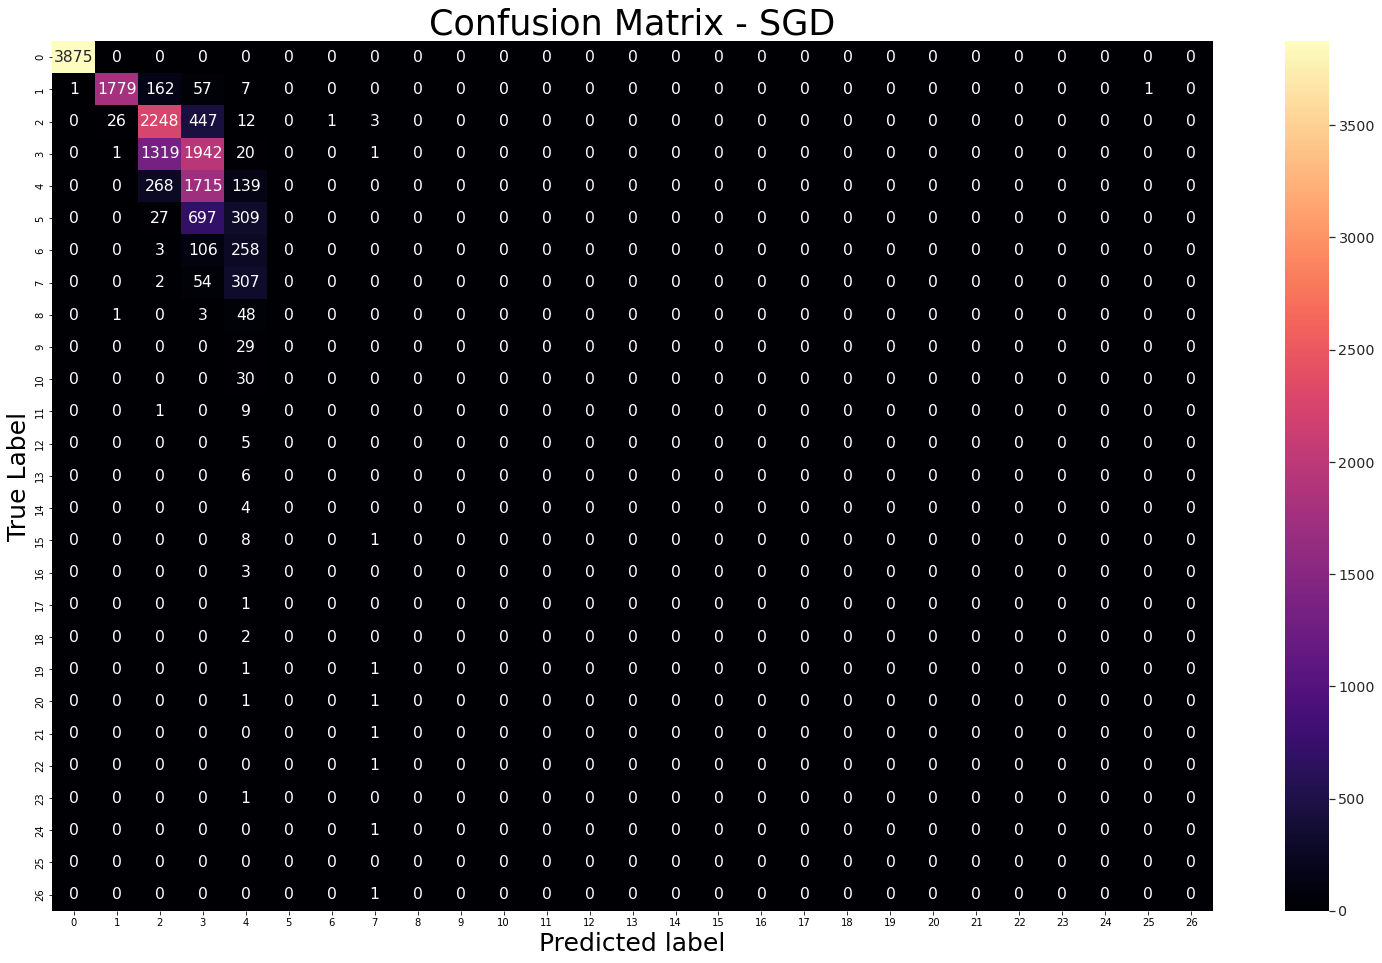

In [79]:
plt.figure(figsize=(26,16))
matrix_df1 = pd.DataFrame(confusion_matrix(y_test, sgd_predict))#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df1, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - SGD', fontsize = 35)
ax.set_xlabel("Predicted label", fontsize =25)
ax.set_ylabel("True Label", fontsize=25)
plt.show()

# <b>9.2 <span style='color:#56ff33'>|</span> K-Nearest-Neighbor (The nearest "3" elements)</b>

In [80]:
model_KNN_3 = {"KNN_3": KNeighborsClassifier(3)} 

In [81]:
metric_fn = zip(["f1", "acc", "precision", "recall"],[f1_score, accuracy_score, precision_score, recall_score])

results = {k:{} for k in ["f1","acc","precision","recall"]}
for name, model in model_KNN_3.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    for name_metric, metric in metric_fn:
        if name_metric == "acc":
            results[name_metric][name] = metric(y_test,y_pred)
        else:
            results[name_metric][name] = metric(y_test,y_pred, average="weighted", zero_division=1)

In [82]:
results

{'f1': {'KNN_3': 0.8351108263997531},
 'acc': {'KNN_3': 0.8380886687151188},
 'precision': {'KNN_3': 0.8350039452198733},
 'recall': {'KNN_3': 0.8380886687151188}}

We will display the confussion matrix;

In [83]:
knn3=KNeighborsClassifier(3)

In [84]:
knn3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
knn3_predict=knn3.predict(X_test)

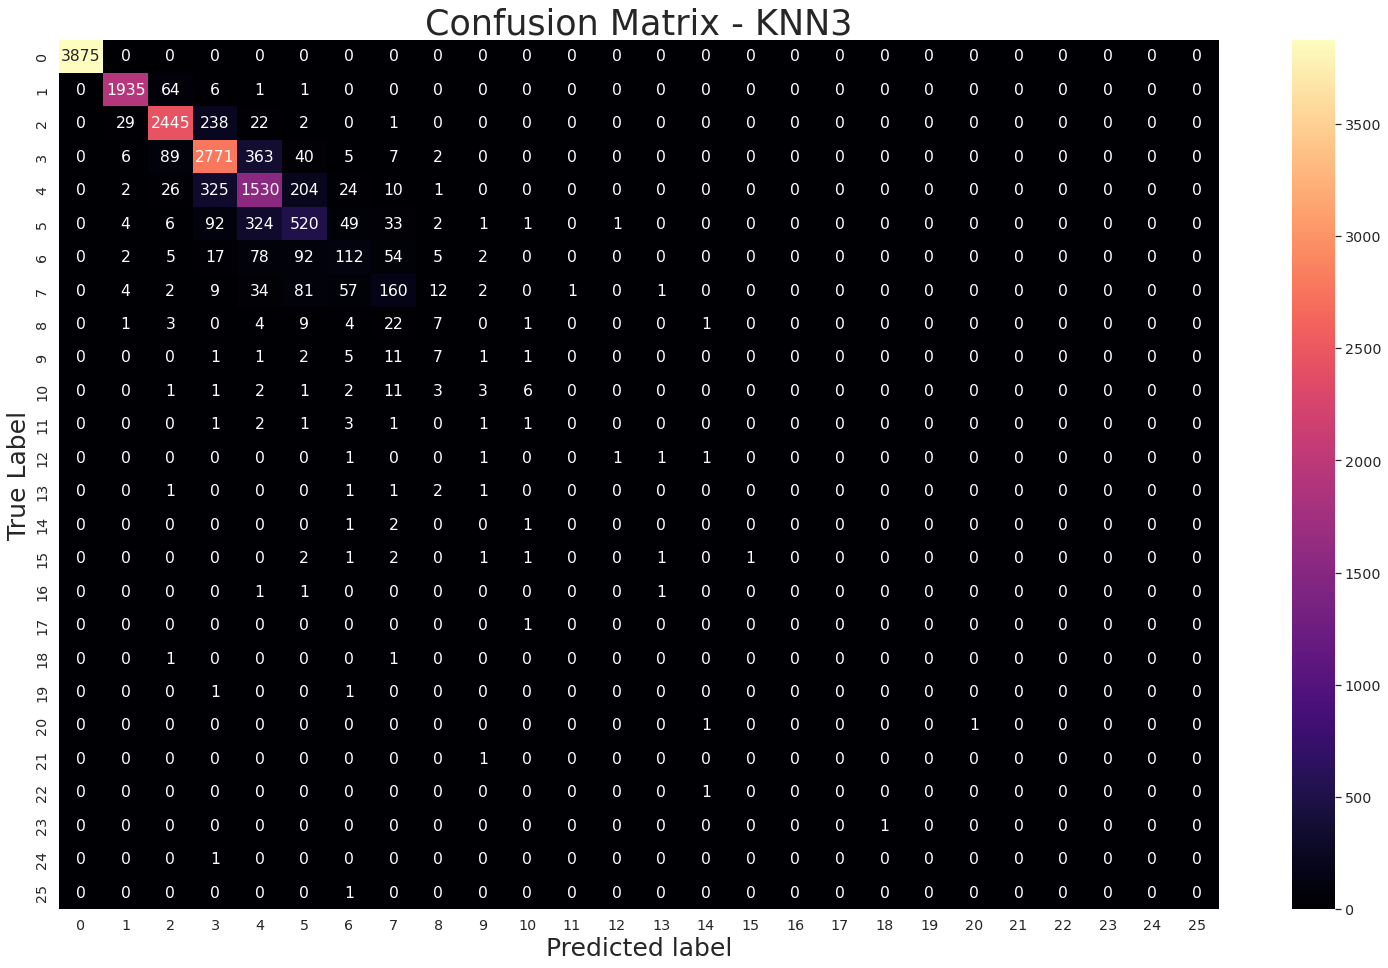

In [86]:
plt.figure(figsize=(26,16))
matrix_df1 = pd.DataFrame(confusion_matrix(y_test, knn3_predict))#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df1, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - KNN3', fontsize = 35)
ax.set_xlabel("Predicted label", fontsize =25)
ax.set_ylabel("True Label", fontsize=25)
plt.show()

# <b>9.3 <span style='color:#56ff33'>|</span> K-Nearest-Neighbor (The nearest "5" elements)</b>

In [87]:
model_KNN_5 = {"KNN_5": KNeighborsClassifier(5)} 

In [88]:
metric_fn = zip(["f1", "acc", "precision", "recall"],[f1_score, accuracy_score, precision_score, recall_score])

results = {k:{} for k in ["f1","acc","precision","recall"]}
for name, model in model_KNN_5.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    for name_metric, metric in metric_fn:
        if name_metric == "acc":
            results[name_metric][name] = metric(y_test,y_pred)
        else:
            results[name_metric][name] = metric(y_test,y_pred, average="weighted", zero_division=1)

In [89]:
results

{'f1': {'KNN_5': 0.8391539174179369},
 'acc': {'KNN_5': 0.841161346961811},
 'precision': {'KNN_5': 0.8400210557011797},
 'recall': {'KNN_5': 0.841161346961811}}

We will display the confussion matrix;

In [90]:
knn5=KNeighborsClassifier(5)

In [91]:
knn5.fit(X_train,y_train)

KNeighborsClassifier()

In [92]:
knn5_predict=knn5.predict(X_test)

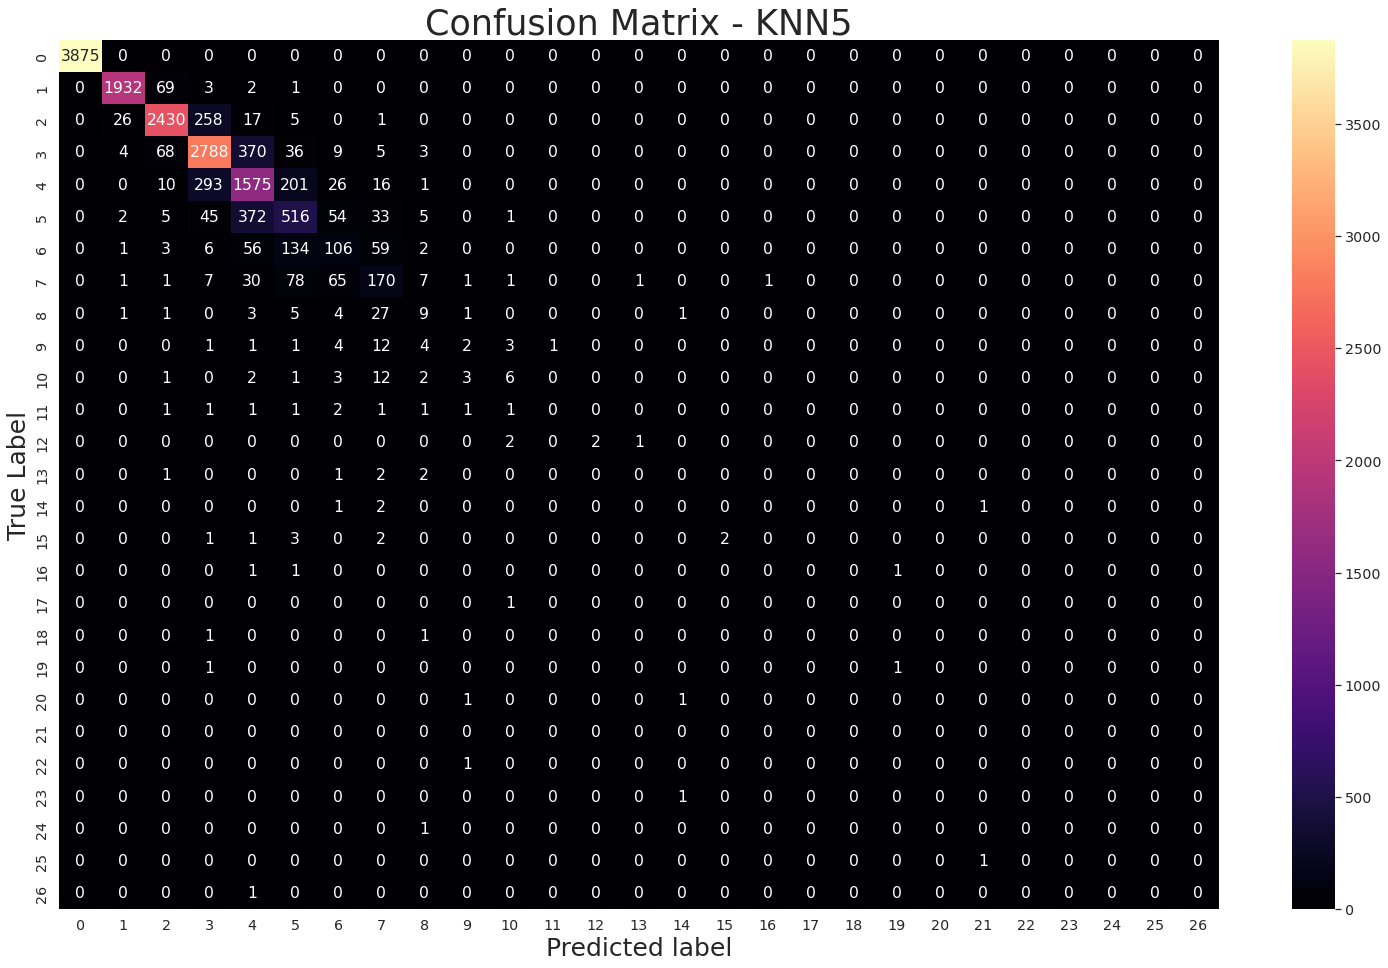

In [93]:
plt.figure(figsize=(26,16))
matrix_df1 = pd.DataFrame(confusion_matrix(y_test, knn5_predict))#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df1, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - KNN5', fontsize = 35)
ax.set_xlabel("Predicted label", fontsize =25)
ax.set_ylabel("True Label", fontsize=25)
plt.show()

# <b>9.4 <span style='color:#56ff33'>|</span> K-Nearest-Neighbor (The nearest "7" elements)</b>

In [94]:
model_KNN_7 = {"KNN_7": KNeighborsClassifier(7)} 

In [95]:
metric_fn = zip(["f1", "acc", "precision", "recall"],[f1_score, accuracy_score, precision_score, recall_score])

results = {k:{} for k in ["f1","acc","precision","recall"]}
for name, model in model_KNN_7.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    for name_metric, metric in metric_fn:
        if name_metric == "acc":
            results[name_metric][name] = metric(y_test,y_pred)
        else:
            results[name_metric][name] = metric(y_test,y_pred, average="weighted", zero_division=1)

In [96]:
results

{'f1': {'KNN_7': 0.8368420570194623},
 'acc': {'KNN_7': 0.838903869066282},
 'precision': {'KNN_7': 0.8379915778338973},
 'recall': {'KNN_7': 0.838903869066282}}

We will display the confussion matrix;

In [97]:
knn7=KNeighborsClassifier(7)

In [98]:
knn7.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [99]:
knn7_predict=knn5.predict(X_test)

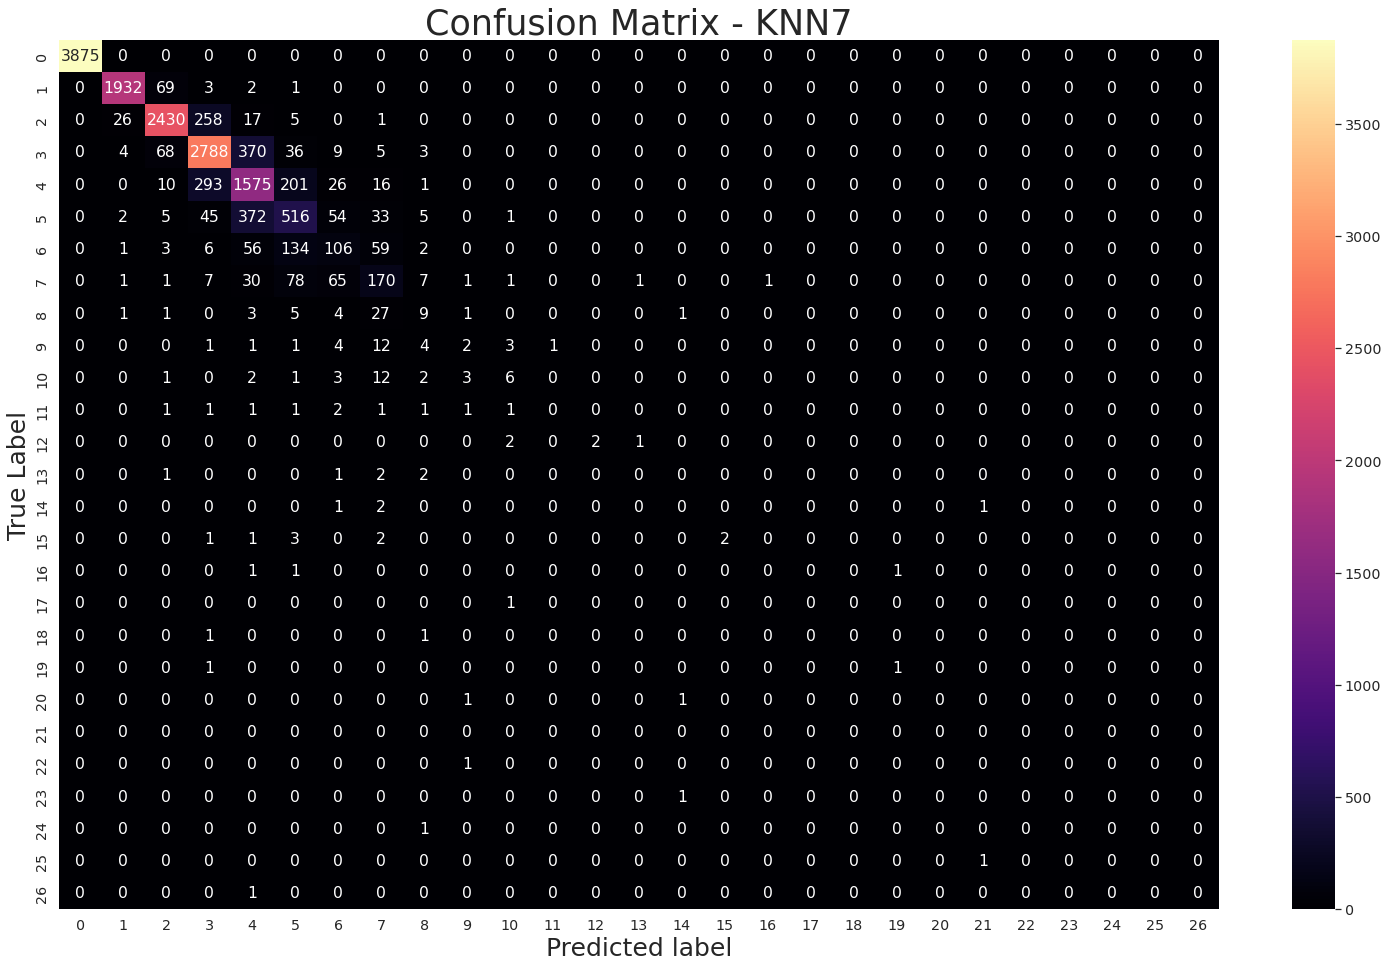

In [100]:
plt.figure(figsize=(26,16))
matrix_df1 = pd.DataFrame(confusion_matrix(y_test, knn7_predict))#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df1, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - KNN7', fontsize = 35)
ax.set_xlabel("Predicted label", fontsize =25)
ax.set_ylabel("True Label", fontsize=25)
plt.show()

# <b>9.5 <span style='color:#56ff33'>|</span> Support Vector Machine (SVC)</b>

In [101]:
model_SVC = {"SVC": SVC()} 

In [102]:
metric_fn = zip(["f1", "acc", "precision", "recall"],[f1_score, accuracy_score, precision_score, recall_score])

results = {k:{} for k in ["f1","acc","precision","recall"]}
for name, model in model_SVC.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    for name_metric, metric in metric_fn:
        if name_metric == "acc":
            results[name_metric][name] = metric(y_test,y_pred)
        else:
            results[name_metric][name] = metric(y_test,y_pred, average="weighted", zero_division=1)

In [103]:
results

{'f1': {'SVC': 0.8362711909654278},
 'acc': {'SVC': 0.8442340252085032},
 'precision': {'SVC': 0.8598684946105344},
 'recall': {'SVC': 0.8442340252085032}}

We will display the confussion matrix;

In [104]:
svc=SVC()

In [105]:
svc.fit(X_train,y_train)

SVC()

In [106]:
svc_predict=svc.predict(X_test)

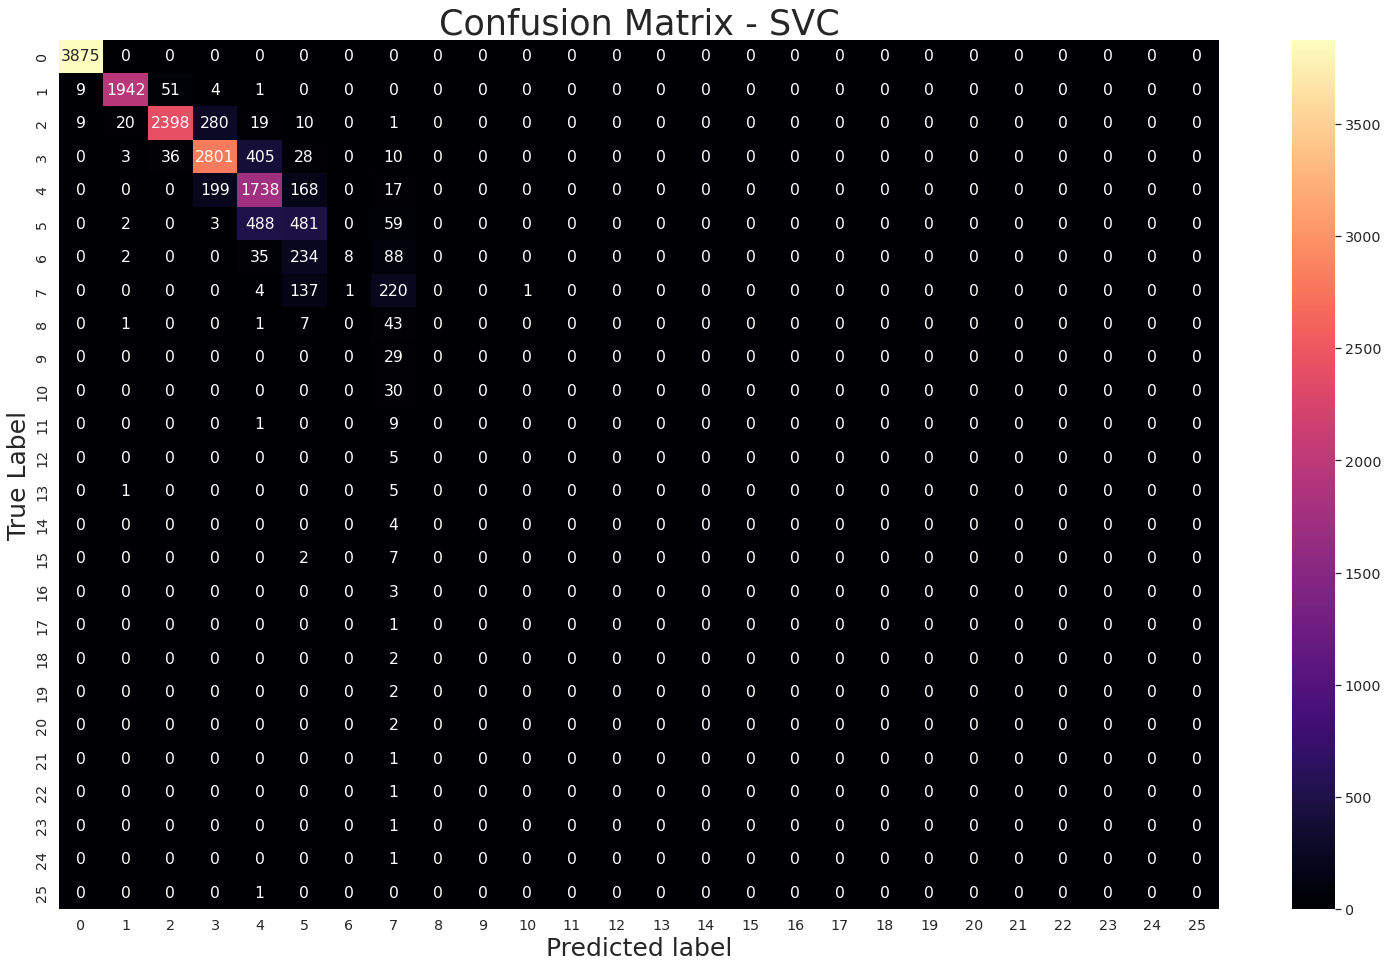

In [107]:
plt.figure(figsize=(26,16))
matrix_df1 = pd.DataFrame(confusion_matrix(y_test, svc_predict))#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df1, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - SVC', fontsize = 35)
ax.set_xlabel("Predicted label", fontsize =25)
ax.set_ylabel("True Label", fontsize=25)
plt.show()

# <b>9.6 <span style='color:#56ff33'>|</span> Random Forest</b>

In [108]:
model_RandomForest = {"RandomForest": RandomForestClassifier()} 

In [109]:
metric_fn = zip(["f1", "acc", "precision", "recall"],[f1_score, accuracy_score, precision_score, recall_score])

results = {k:{} for k in ["f1","acc","precision","recall"]}
for name, model in model_RandomForest.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    for name_metric, metric in metric_fn:
        if name_metric == "acc":
            results[name_metric][name] = metric(y_test,y_pred)
        else:
            results[name_metric][name] = metric(y_test,y_pred, average="weighted", zero_division=1)

In [110]:
results

{'f1': {'RandomForest': 0.9926622366372477},
 'acc': {'RandomForest': 0.9932902740327334},
 'precision': {'RandomForest': 0.9929798629379891},
 'recall': {'RandomForest': 0.9932902740327334}}

We will display the confussion matrix;

In [111]:
rf=RandomForestClassifier()

In [112]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [113]:
rf_predict=rf.predict(X_test)

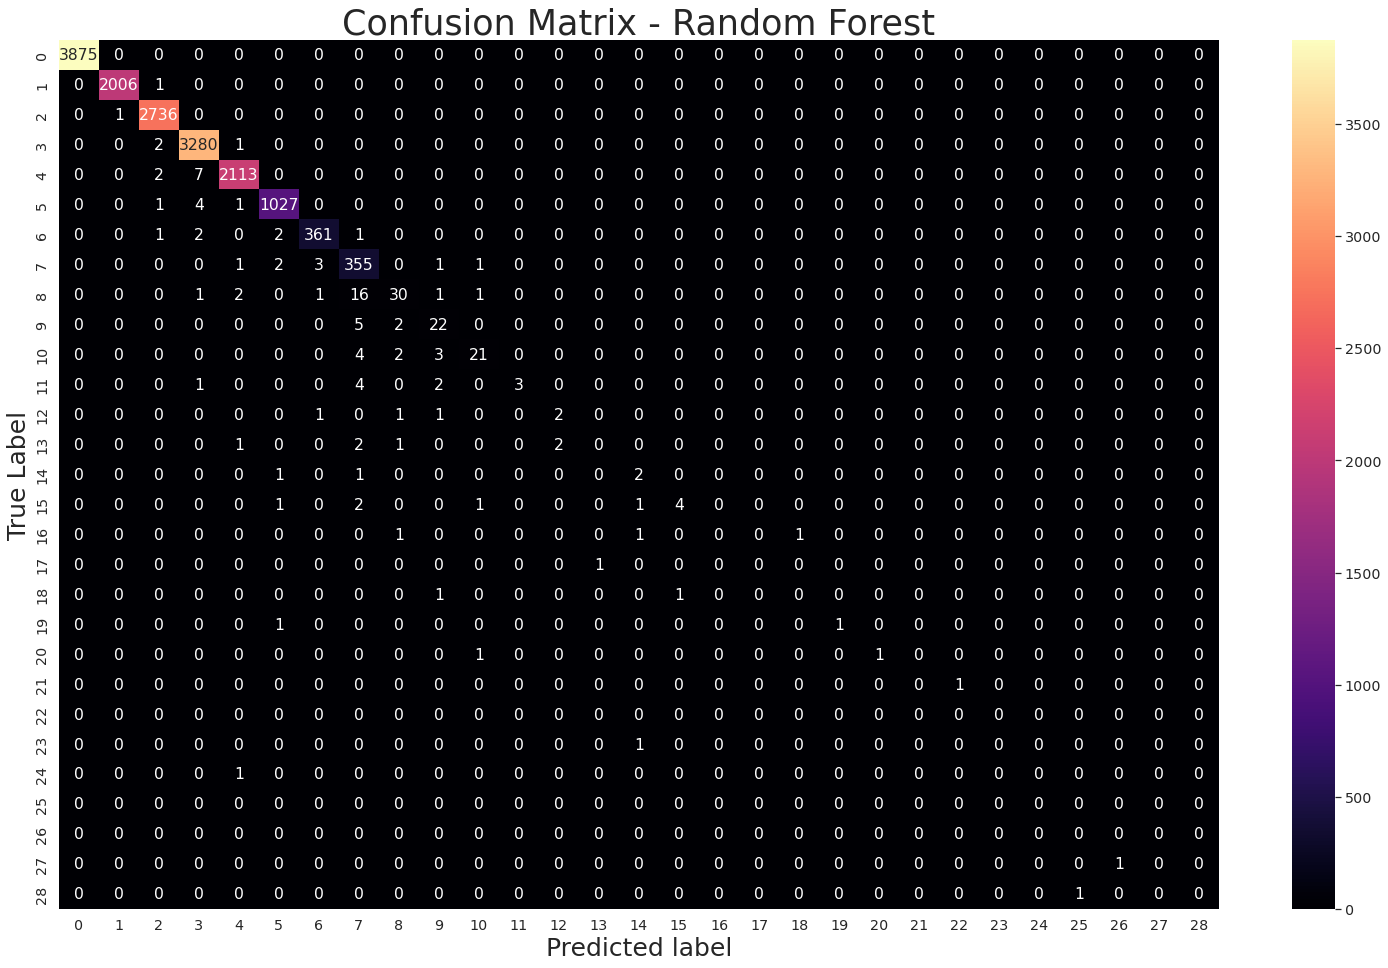

In [114]:
plt.figure(figsize=(26,16))
matrix_df1 = pd.DataFrame(confusion_matrix(y_test, rf_predict))#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df1, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Random Forest', fontsize = 35)
ax.set_xlabel("Predicted label", fontsize =25)
ax.set_ylabel("True Label", fontsize=25)
plt.show()

As per the different metrics to measure the models, the algorithm with the best prediction is Random Forest with an average of 0.99. SVC is the second one with an average metric of 0.84 and the wort one is SGD with an average of 0.62.

# <b>10 <span style='color:#DC33FF'>|</span> CLUSTERING</b>

In order to analyze and calculate the different clusters that compose the customers, we will use the K-Means algorithm.

The k-means algorithm is a clustering method that divides a data set into k groups or clusters. The data are grouped such that points in the same cluster are more similar to each other than points in other clusters.

We will keep only the necessary changes in the dataset, such as changing from categorical to numeric variables, as well as standardization and one hot encoding to prepare data to apply the K-Means algorithm.

In [115]:
df_cluster = pd.read_excel("HotelCustomersDataset.xlsx")

As there are 80 duplicated instances, I will remove them because they do not provide extra information and they are redundant records.

In [116]:
df_cluster.duplicated(subset=['Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom']).sum()

80

In [117]:
df_cluster=df_cluster.drop_duplicates()

I will check if there are null.

In [118]:
df_cluster.isna().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

I will check which percentage are nulls over the total data.

In [119]:
100*df_cluster.isna().sum()/df.shape[0]

ID                      0.000000
Nationality             0.000000
Age                     4.739449
DaysSinceCreation       0.000000
NameHash                0.000000
DocIDHash               0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoo

As the percentage of nulls is 4.5% over the total data, I will remove them, because it will not affect our data and to our analysis.

Besides, I checked that in the variable "Age", minimum age is -11 years old. Definition: Customer's age (in years) at the last day of the extraction period. So, I will proceed to eliminate not only the nulls registers but also those whose value is negative.

In [120]:
df_cluster=df_cluster.dropna(subset=['Age'])

In [121]:
df_cluster.isna().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [122]:
df_cluster = df_cluster[df_cluster['Age'] > 0]

I delete features "ID", "NameHash" y "DocIDHash" because are not relevant for the process of clustering.

In [123]:
df_cluster = df_cluster.drop(['ID', 'NameHash', 'DocIDHash'], axis=1)

In [124]:
df_cluster.head(15)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
6,JPN,49.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,FRA,32.0,1095,38,535.0,94.0,0,0,1,10,...,0,0,0,0,1,0,0,0,0,0
8,FRA,42.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,IRL,25.0,1095,96,174.0,69.0,0,0,1,6,...,0,0,0,0,0,0,0,0,0,0
10,IRL,27.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df_cluster.dtypes

Nationality              object
Age                     float64
DaysSinceCreation         int64
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

Although there are 187 source markets and only with the top 20 markets are included more than 90% of the instances (customers). I will keep all of them to model the different cohorts.

We can check the distribution of several features as well as the correlation between some of them.

<AxesSubplot: >

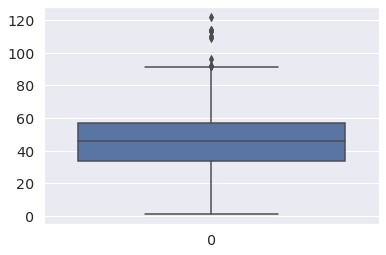

In [126]:
sns.boxplot(df_cluster['Age'])

<AxesSubplot: >

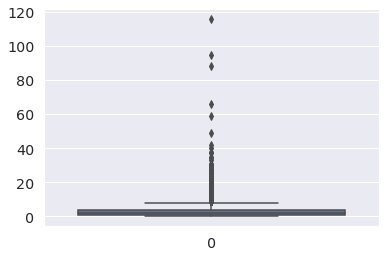

In [127]:
sns.boxplot(df_cluster['RoomNights'])

<AxesSubplot: >

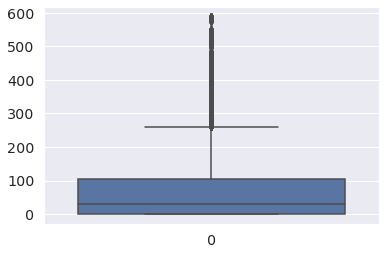

In [128]:
sns.boxplot(df_cluster['AverageLeadTime'])

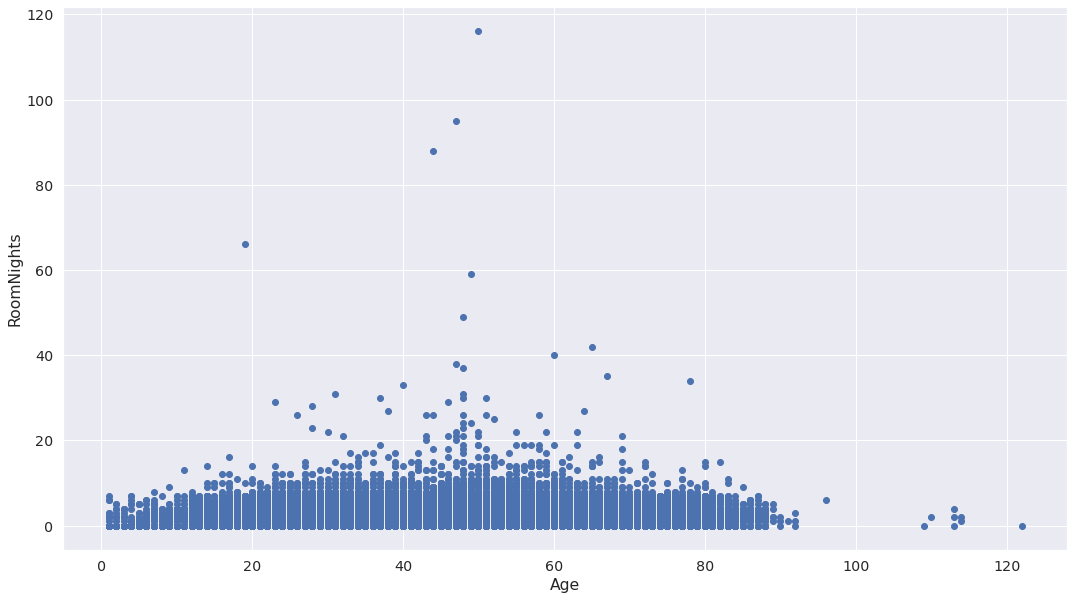

In [129]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_cluster['Age'], df_cluster['RoomNights'])
 
# x-axis label
ax.set_xlabel('Age')
 
# y-axis label
ax.set_ylabel('RoomNights')
plt.show()

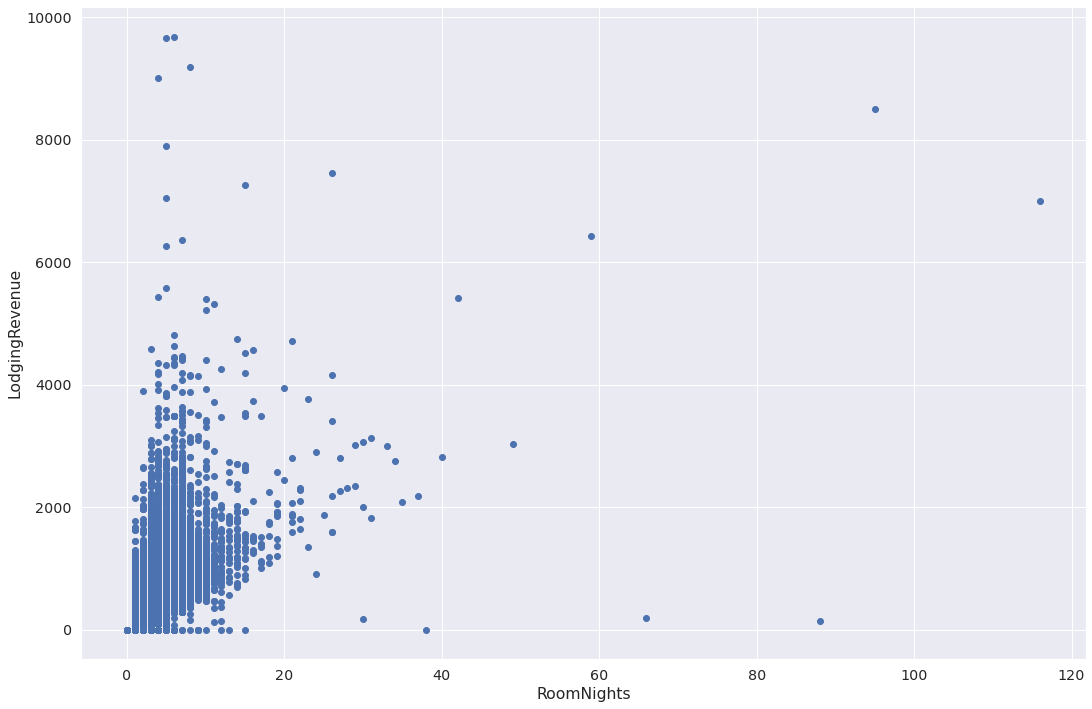

In [130]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,12))
ax.scatter(df_cluster['RoomNights'], df_cluster["LodgingRevenue"])
 
# x-axis label
ax.set_xlabel('RoomNights')
 
# y-axis label
ax.set_ylabel('LodgingRevenue')
plt.show()

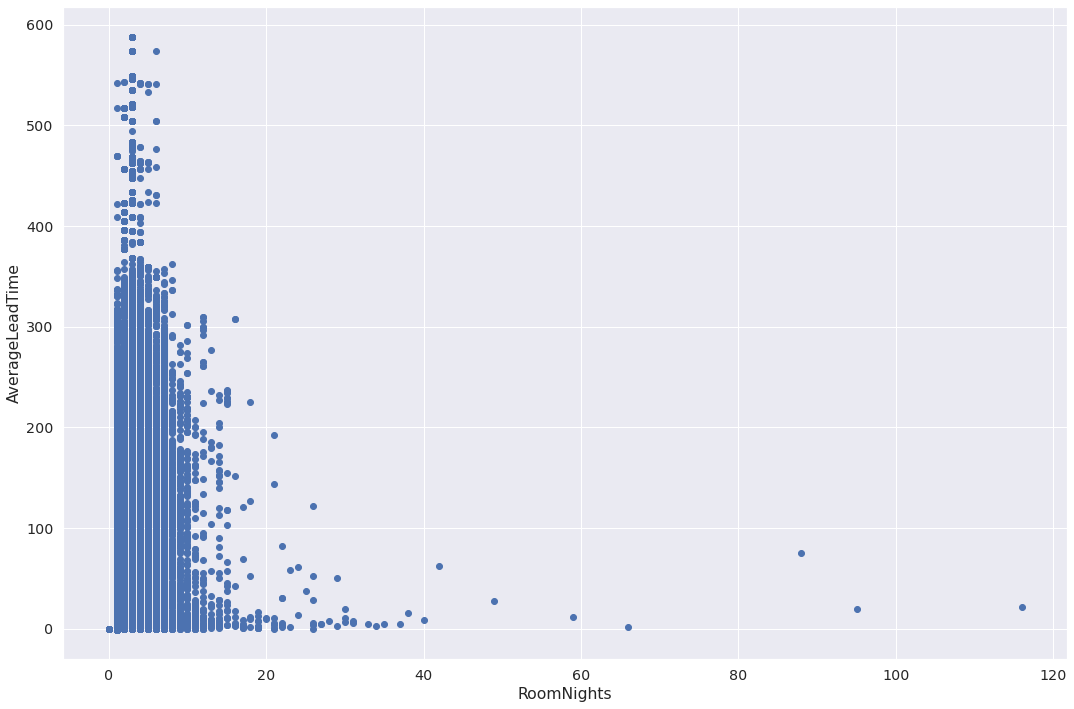

In [131]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,12))
ax.scatter(df_cluster['RoomNights'], df_cluster["AverageLeadTime"])
 
# x-axis label
ax.set_xlabel('RoomNights')
 
# y-axis label
ax.set_ylabel('AverageLeadTime')
plt.show()

# <b>10.1 <span style='color:#56ff33'>|</span> Standarization</b>

First, let's standardize all variables in the dataset to get them around the same scale. All variables will be scaled to follow a normal distribution before being fed into the model, except those variables that are already standarized. We will standardize these variables with a mean of 0 and a standard deviation of 1.

In [132]:
col_names = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue','BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
'PersonsNights', 'RoomNights', 'DaysSinceLastStay','DaysSinceFirstStay','SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed','SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar','SRQuietRoom']               
features = df_cluster[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0.336820,-0.955003,-0.248046,0.186582,0.331164,15.138207,-0.020365,3.196055,0.719130,1.193646,...,-0.029639,-0.054131,-0.042234,-0.115059,-0.745501,-0.409332,-0.018741,-0.059887,-0.011198,-0.316295
1,-0.873270,2.087906,-0.759506,-0.821357,-0.603467,-0.027954,-0.020365,-1.149037,-1.024730,-1.082172,...,-0.029639,-0.054131,-0.042234,-0.115059,-0.745501,-0.409332,-0.018741,-0.059887,-0.011198,-0.316295
2,0.881360,2.087906,0.297512,-0.169321,-0.070914,-0.027954,-0.020365,0.299327,1.155095,1.193646,...,-0.029639,-0.054131,-0.042234,-0.115059,-0.745501,-0.409332,-0.018741,-0.059887,-0.011198,-0.316295
3,0.336820,2.087906,-0.759506,-0.821357,-0.603467,-0.027954,-0.020365,-1.149037,-1.024730,-1.082172,...,-0.029639,-0.054131,-0.042234,-0.115059,-0.745501,-0.409332,-0.018741,-0.059887,-0.011198,-0.316295
4,0.518333,2.087906,-0.100291,-0.196489,-0.390445,-0.027954,-0.020365,0.299327,-0.152800,-0.171845,...,-0.029639,-0.054131,-0.042234,-0.115059,-0.745501,-0.409332,-0.018741,-0.059887,-0.011198,-0.316295


# <b>10.2 <span style='color:#56ff33'>|</span> One Hot Encoding</b>

In [133]:
cat_features = df_cluster.select_dtypes(include = ["object"]).columns
cat_features

Index(['Nationality', 'DistributionChannel', 'MarketSegment'], dtype='object')

In [134]:
cat_df_cluster = pd.get_dummies(df_cluster[cat_features], drop_first = True)
cat_df_cluster.head()

,Nationality_AGO,Nationality_AIA,Nationality_ALB,Nationality_AND,Nationality_ARE,Nationality_ARG,Nationality_ARM,Nationality_ASM,Nationality_ATA,Nationality_ATF,...,Nationality_ZWE,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [135]:
df_cluster.drop(cat_features, axis = 1, inplace = True)

In [136]:
df_cluster = pd.concat([df_cluster, cat_df_cluster], axis = 1)

In [137]:
print(df_cluster.columns.tolist())
type(df_cluster.columns.tolist())

['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'Nationality_AGO', 'Nationality_AIA', 'Nationality_ALB', 'Nationality_AND', 'Nationality_ARE', 'Nationality_ARG', 'Nationality_ARM', 'Nationality_ASM', 'Nationality_ATA', 'Nationality_ATF', 'Nationality_ATG', 'Nationality_AUS', 'Nationality_AUT', 'Nationality_AZE', 'Nationality_BEL', 'Nationality_BEN', 'Nationality_BGD', 'Nationality_BGR', 'Nationality_BHR', 'Nationality_BHS', 'Nationality_BIH', 'Nationality_BLR', 'Nationality_BOL', 'Nationality_BRA', 'Nationality_BRB', 'Nationality_BWA', 'Nationality_CAF', 'Nationality_CAN', 'Nationality_CHE', 'Nationality_CHL', 'Na

list

In [138]:
df_cluster.dtypes

Age                                    float64
DaysSinceCreation                        int64
AverageLeadTime                          int64
LodgingRevenue                         float64
OtherRevenue                           float64
                                        ...   
MarketSegment_Corporate                  uint8
MarketSegment_Direct                     uint8
MarketSegment_Groups                     uint8
MarketSegment_Other                      uint8
MarketSegment_Travel Agent/Operator      uint8
Length: 220, dtype: object

In [139]:
df_cluster.shape

(79752, 220)

In [140]:
df_cluster.isna().sum()

Age                                    0
DaysSinceCreation                      0
AverageLeadTime                        0
LodgingRevenue                         0
OtherRevenue                           0
                                      ..
MarketSegment_Corporate                0
MarketSegment_Direct                   0
MarketSegment_Groups                   0
MarketSegment_Other                    0
MarketSegment_Travel Agent/Operator    0
Length: 220, dtype: int64

## <b>10.3 <span style='color:#56ff33'>|</span> KMEANS</b>

Este código está realizando un análisis de clustering con el algoritmo KMeans. El objetivo del análisis es encontrar el número óptimo de clusters para dividir los datos, para lo cual se está evaluando el valor de la suma de errores al cuadrado (SSE, por sus siglas en inglés) en función del número de clusters.

En concreto, el código está iterando sobre el número de clusters de 1 a 9, y en cada iteración se está ajustando un modelo KMeans con el número de clusters correspondiente y guardando el valor de su SSE. Luego, los valores de SSE se están guardando en una lista llamada SSE.

Finalmente, se está graficando el resultado en un gráfico de línea que muestra el número de clusters en el eje X y el valor de SSE en el eje Y. La gráfica permite identificar el "codo" en la curva de SSE para determinar el número óptimo de clusters para los datos.


Regla del codo
Este número k es un hiperparámetro del algoritmo. Representa el número de centroides (centro del clúster) que queremos encontrar en el dataset. Para saber qué k tenemos que coger utilizamos el método del codo o regla del codo que explico durante el caso práctico.


El algoritmo intenta minimizar la distancia entre las observaciones que pertenecen a un clúster y su centroide. Es decir, el objetivo del K-Means es minimizar la suma de las distancias entre los puntos y el centroide al que pertenecen.


Elección de k con la regla del codo
Ahora viene la chicha del post. Vamos a elegir el número de clústers idóneos para nuestro problema. Para ello, vamos a realizar varias ejecuciones con una k diferente (desde 1 clúster hasta 12) y representaremos en un gráfico la distancia media de cada punto hasta su centroide y el tiempo de entrenamiento necesario.

La idea es que a medida que vamos aumentando la cantidad de centroides, la distancia media de los puntos al centroide irá disminuyendo cada vez menos. La norma mnemotécnica es la norma del codo puesto que la gráfica es una curva y el número de clústers óptimo será el ‘codo’ del brazo.

Vamos a elegir el número de clústers idóneos para nuestro problema. Para ello, vamos a realizar varias ejecuciones con una k diferente (desde 1 clúster hasta 15) y representaremos en un gráfico la distancia media de cada punto hasta su centroide y el tiempo de entrenamiento necesario.

La idea es que a medida que vamos aumentando la cantidad de centroides, la distancia media de los puntos al centroide irá disminuyendo cada vez menos. La norma mnemotécnica es la norma del codo puesto que la gráfica es una curva y el número de clústers óptimo será el ‘codo’ del brazo.

El objetivo de K-Means es claro: agrupar observaciones similares para descubrir patrones que a simple vista se desconocen. Para conseguirlo, el algoritmo busca un número fijo (k) de clústers en el dataset.



Text(0, 0.5, 'Inertia')

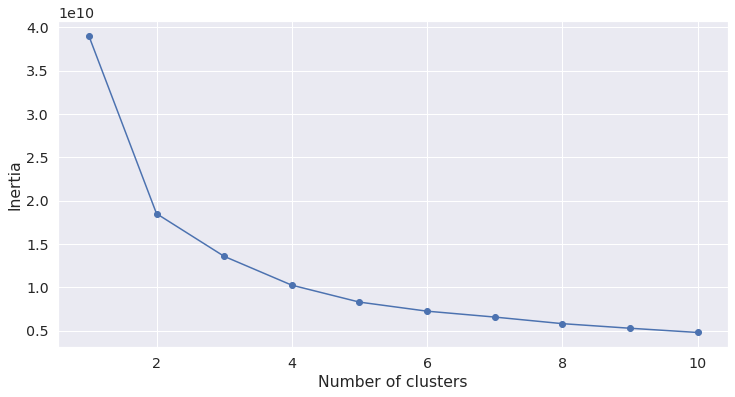

In [141]:
SSE = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_cluster)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## <b>10.3 <span style='color:#56ff33'>|</span> Silhoutte score</b>

A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.

Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

The silhouette score measures the distance between all the data points within the same cluster. The lower this distance, the better the silhouette score.

It also measures the distance between an object and the data points in the nearest cluster. The higher this distance, the better.

A silhouette score closer to +1 indicates good clustering performance, and a silhouette score closer to -1 indicates a poor clustering model.

In [142]:
# First, build a model with 2 clusters

kmeans = KMeans(n_clusters = 2, init='k-means++')
kmeans.fit(df_cluster)

# Now, print the silhouette score of this model

print(silhouette_score(df_cluster, kmeans.labels_, metric='euclidean'))

0.5068489690370516


In [143]:
# First, build a model with 3 clusters

kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_cluster)

# Now, print the silhouette score of this model

print(silhouette_score(df_cluster, kmeans.labels_, metric='euclidean'))

0.5280351267675463


In [144]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(df_cluster)

# Now, print the silhouette score of this model

print(silhouette_score(df_cluster, kmeans.labels_, metric='euclidean'))

0.43621449696490777


In [145]:
# First, build a model with 5 clusters

kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(df_cluster)

# Now, print the silhouette score of this model

print(silhouette_score(df_cluster, kmeans.labels_, metric='euclidean'))

0.42505767373108705


## <b>10.4 <span style='color:#56ff33'>|</span> Building Clustering model 1</b>

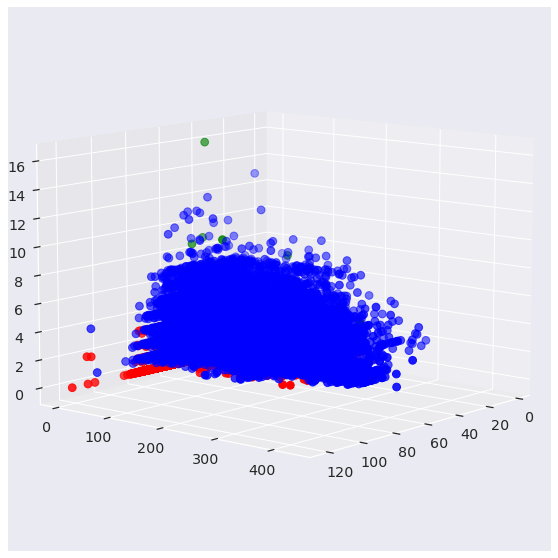

In [146]:
clusters = kmeans.fit_predict(scaled_features.iloc[:,1:])
df_cluster.loc[:, "label"] = clusters

#df1["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster.Age[df_cluster.label == 0], df_cluster["AverageLeadTime"][df_cluster.label == 0], df_cluster["RoomNights"][df_cluster.label == 0], c='blue', s=60)
ax.scatter(df_cluster.Age[df_cluster.label == 1], df_cluster["AverageLeadTime"][df_cluster.label == 1], df_cluster["RoomNights"][df_cluster.label == 1], c='red', s=60)
ax.scatter(df_cluster.Age[df_cluster.label == 2], df_cluster["AverageLeadTime"][df_cluster.label == 2], df_cluster["RoomNights"][df_cluster.label == 2], c='green', s=60)

ax.view_init(10, 40)
plt.show()

## EXPLICACIÓN DE LO DE ABAJO


This code is performing a clustering analysis using the KMeans algorithm on a dataset X. The goal of the analysis is to group the observations into 3 clusters based on their similarity. Here is a breakdown of the code:

X_scaled = scale(X) - The dataset X is first standardized using the scale function to ensure that all variables have the same scale and variance.

modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=123) - The KMeans algorithm is instantiated with the number of clusters set to 3, 25 random initializations and a random state of 123.

modelo_kmeans.fit(X=X_scaled) - The fit method is called on the KMeans model to fit the clusters on the standardized dataset X_scaled.

y_predict = modelo_kmeans.predict(X=X_scaled) - The predict method is called to obtain the predicted cluster labels for each observation in the dataset X_scaled.

The next part of the code creates a plot to visually compare the original groups in the data with the clusters generated by KMeans.

fig, ax = plt.subplots(1, 2, figsize=(10, 4)) - A figure with two subplots is created to plot the original groups and the KMeans clusters side by side.

for i in np.unique(y): - A loop is initiated to plot the original groups. np.unique(y) returns the unique values of the original group labels.

ax[0].scatter(...) - The scatter plot is created for each original group. The x and y coordinates are taken from X_scaled for each group, and the color is determined by the plt.rcParams['axes.prop_cycle'].by_key()['color'][int(i)] argument.

ax[0].set_title('Grupos originales') - A title is set for the first subplot.

for i in np.unique(y_predict): - Another loop is initiated to plot the KMeans clusters. np.unique(y_predict) returns the unique values of the predicted cluster labels.

ax[1].scatter(...) - The scatter plot is created for each KMeans cluster. The x and y coordinates are taken from X_scaled

# Escalado de datos
# ==============================================================================
X_scaled = scale(X)

# Modelo
# ==============================================================================
X_scaled = scale(X)
modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=123)
modelo_kmeans.fit(X=X_scaled)

y_predict = modelo_kmeans.predict(X=X_scaled)

# Representación gráfica: grupos originales vs clusters creados
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][int(i%len(plt.rcParams['axes.prop_cycle'].by_key()['color']))],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Grupos originales')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][int(i%len(plt.rcParams['axes.prop_cycle'].by_key()['color']))],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();


In [147]:
df_cluster_scaled = scale(df_cluster)

In [148]:
df_cluster_scaled = scale(X)
modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=123)
modelo_kmeans.fit(X=df_cluster_scaled)

KMeans(n_clusters=3, n_init=25, random_state=123)

In [149]:
y_predict = modelo_kmeans.predict(X=df_cluster_scaled)

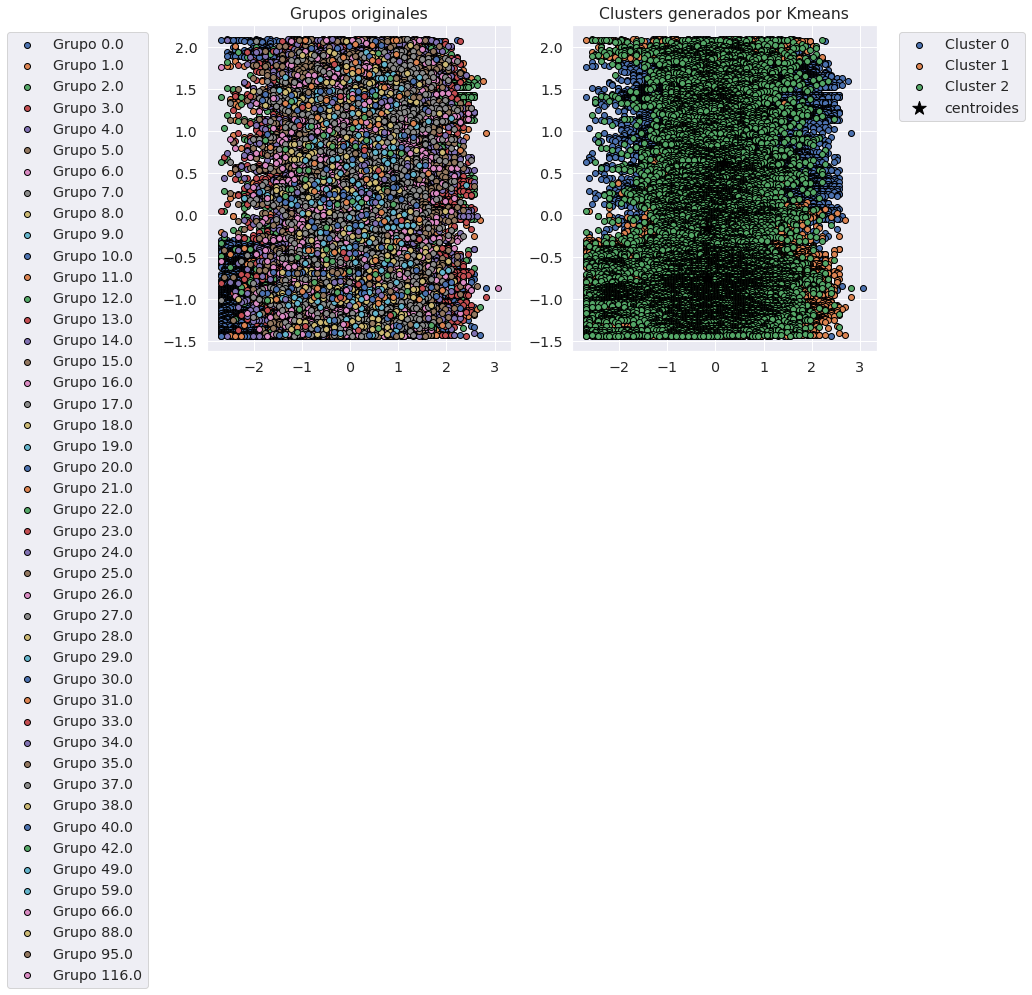

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

y_reshaped = np.array(y).reshape(len(y), 1)
y_predict_reshaped = np.array(y_predict).reshape(len(y_predict), 1)

for i in np.unique(y_reshaped):
    ax[0].scatter(
        x = df_cluster_scaled[np.squeeze(y_reshaped == i), 0],
        y = df_cluster_scaled[np.squeeze(y_reshaped == i), 1], 
        color = plt.rcParams['axes.prop_cycle'].by_key()['color'][int(i%len(plt.rcParams['axes.prop_cycle'].by_key()['color']))],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
ax[0].set_title('Grupos originales')
#ax[0].legend();
ax[0].legend(loc='best')
ax[0].legend(bbox_to_anchor=(-0.68, 1), loc='upper left')

for i in np.unique(y_predict_reshaped):
    ax[1].scatter(
        x = df_cluster_scaled[np.squeeze(y_predict_reshaped == i), 0],
        y = df_cluster_scaled[np.squeeze(y_predict_reshaped == i), 1], 
        color = plt.rcParams['axes.prop_cycle'].by_key()['color'][int(i%len(plt.rcParams['axes.prop_cycle'].by_key()['color']))],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
    )
ax[1].set_title('Clusters generados por Kmeans')
#ax[1].legend();
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## <b>10.5 <span style='color:#56ff33'>|</span> Building Clustering model 2</b>

For this model, lets do some feature selection.

We can use a technique called Principal Component Analysis (PCA).

PCA is a technique that helps us reduce the dimension of a dataset. When we run PCA on a data frame, new components are created. These components explain the maximum variance in the model.

We can select a subset of these variables and include them into the K-means model.

Now, lets run PCA on the dataset:

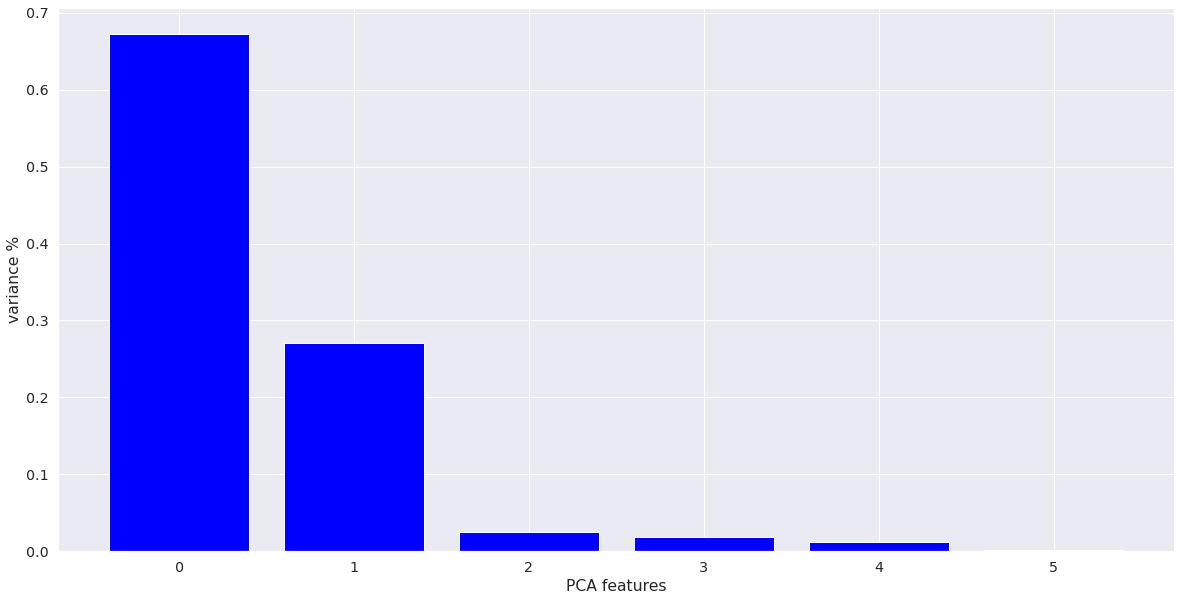

In [151]:
pca = PCA(n_components= 6)
principalComponents = pca.fit_transform(df_cluster)

plt.figure(figsize=(20,10))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

This chart shows us each PCA component, along with it variance.
Based on this visualization, we can see that the first two PCA components explain around 85% of the dataset variance.
We can feed these two components into the model.

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Supóngase que existe una muestra con n
 individuos cada uno con p
 variables (X1
, X2
, …, Xp
), es decir, el espacio muestral tiene p
 dimensiones. PCA permite encontrar un número de factores subyacentes (z<p)
 que explican aproximadamente lo mismo que las p
 variables originales. Donde antes se necesitaban p
 valores para caracterizar a cada individuo, ahora bastan z
 valores. Cada una de estas z
 nuevas variables recibe el nombre de componente principal.

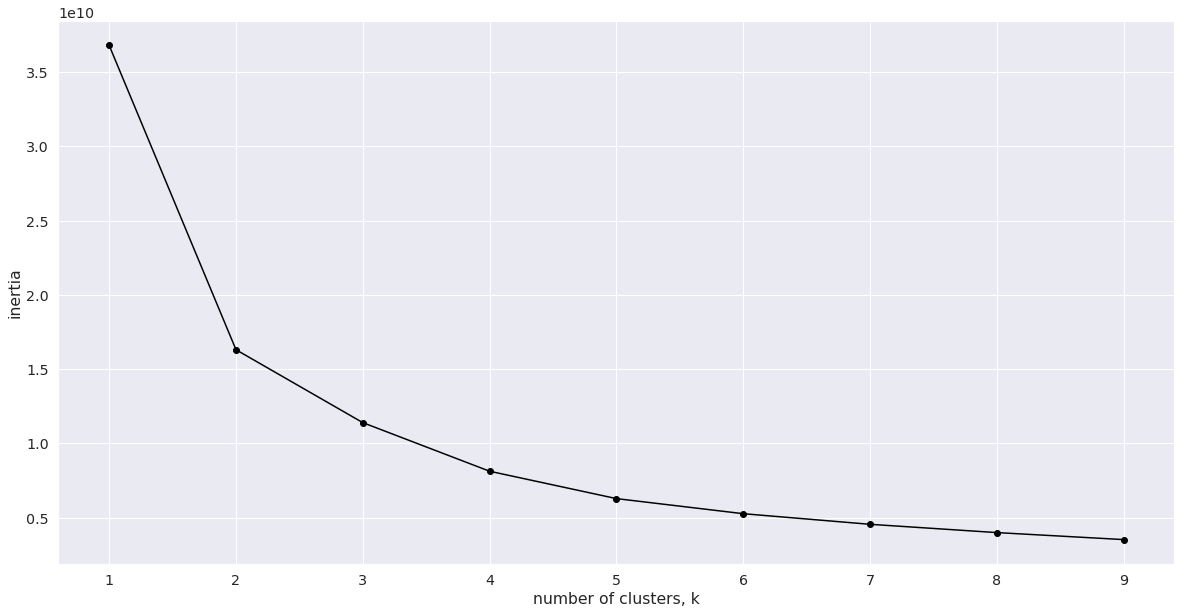

In [152]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [153]:
# First, build a model with 2 clusters

kmeans = KMeans(n_clusters = 2, init='k-means++')
kmeans.fit(df1)

# Now, print the silhouette score of this model

print(silhouette_score(df1, kmeans.labels_, metric='euclidean'))

0.4571854336834343


In [154]:
# First, build a model with 3 clusters

kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df1)

# Now, print the silhouette score of this model

print(silhouette_score(df1, kmeans.labels_, metric='euclidean'))

0.4989277870870302


In [155]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(df1)

# Now, print the silhouette score of this model

print(silhouette_score(df1, kmeans.labels_, metric='euclidean'))

0.451613931609578


In [156]:
# First, build a model with 5 clusters

kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(df1)

# Now, print the silhouette score of this model

print(silhouette_score(df1, kmeans.labels_, metric='euclidean'))

0.4543124671718221


Agai, tt looks like the optimal number of clusters is 3.

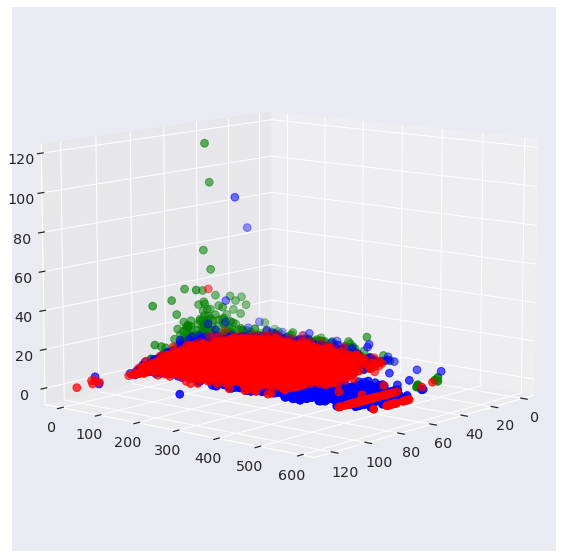

In [157]:
model = KMeans(n_clusters=3)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
df_cluster.loc[:, "label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cluster.Age[df_cluster.label == 0], df_cluster["AverageLeadTime"][df_cluster.label == 0], df_cluster["RoomNights"][df_cluster.label == 0], c='blue', s=60)
ax.scatter(df_cluster.Age[df_cluster.label == 1], df_cluster["AverageLeadTime"][df_cluster.label == 1], df_cluster["RoomNights"][df_cluster.label == 1], c='red', s=60)
ax.scatter(df_cluster.Age[df_cluster.label == 2], df_cluster["AverageLeadTime"][df_cluster.label == 2], df_cluster["RoomNights"][df_cluster.label == 2], c='green', s=60)

ax.view_init(10,40)
plt.show()

## <b>10.6 <span style='color:#56ff33'>|</span> KMeans Data segmentation</b>

In [158]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) # Gets a random centroid from each column
        centroids.append(centroid)
        
    return pd.concat(centroids, axis = 1)

In [159]:
sample_centroids = random_centroids(df_cluster, 3) # get 3 samples of of centroids from each column
sample_centroids

,0,1,2
Age,68.0,31.0,20.0
DaysSinceCreation,421.0,160.0,651.0
AverageLeadTime,265.0,158.0,0.0
LodgingRevenue,0.0,0.0,253.0
OtherRevenue,0.0,157.8,14.0
...,...,...,...
MarketSegment_Direct,0.0,0.0,0.0
MarketSegment_Groups,0.0,0.0,0.0
MarketSegment_Other,1.0,1.0,1.0
MarketSegment_Travel Agent/Operator,0.0,0.0,0.0


Label each data point

In [160]:
sample_centroids.apply(lambda x: np.sqrt((df_cluster- x)**2 ).sum(axis = 1)) # Calculate the distance

,0,1,2
0,2755.3,1126.5,2635.3
2,1819.0,2944.8,1633.0
3,2542.0,1899.8,1950.0
4,1799.0,2964.8,1653.0
5,2524.0,1939.8,1866.0
...,...,...,...
83585,1541.0,2190.8,1861.0
83586,2042.6,2360.8,2042.6
83587,1541.0,2190.8,1861.0
83588,2427.3,3083.1,2477.3


Let's convett it into a function, and label the points

In [161]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt((data - x)**2 ).sum(axis = 1)) # Calculate the distance
    return distances.idxmin(axis = 1) # Label each point by getting the index of the leastest value (nearest point)

In [162]:
sample_labels = get_labels(df_cluster,sample_centroids)
sample_labels.value_counts()

2    40591
0    31558
1     7603
dtype: int64

In [163]:
# Update values
def new_centroids(data, labels):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [164]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) # Reduce dimensonality for visualiztion
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T)
    clear_output(wait = True) # Clear the output and then rewrite the board
    plt.figure(figsize = (12,7))
    plt.title('Iteration {}'.format(iteration))
    plt.scatter(x = data_2d[:, 0], y = data_2d[:, 1], c = labels )
    plt.scatter(x = centroids_2d[:, 0], y = centroids_2d[:, 1] )
    plt.show()

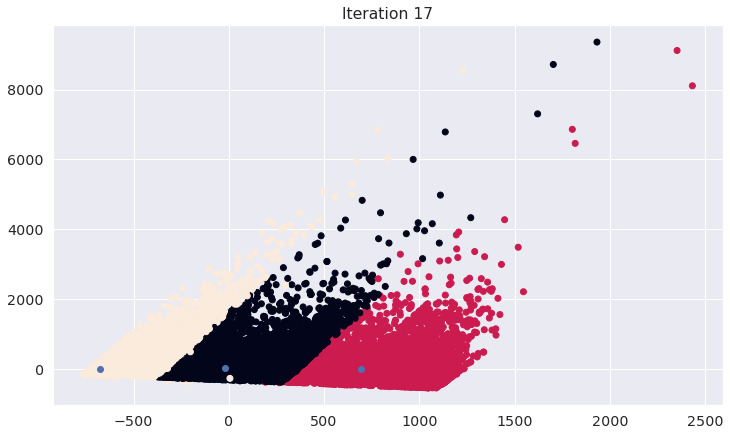

In [165]:
max_iteration = 100
k = 3
centroids = random_centroids(df_cluster, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df_cluster, centroids)
    centroids = new_centroids(df_cluster, labels)
    plot_clusters(df_cluster, labels, centroids, iteration)
    iteration += 1

## <b>10.7 <span style='color:#56ff33'>|</span> Clustering Analysis</b>

In [166]:
# Initalize Labels column
df['labels'] = labels

Distrbution of ages for each label

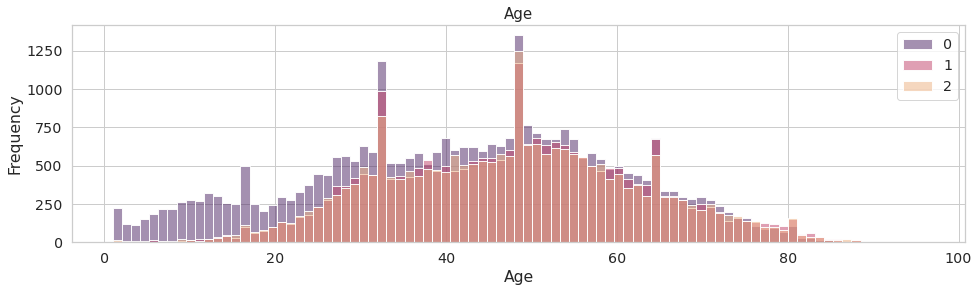

In [167]:
plt.figure(figsize = (16,4))
sns.set_style('whitegrid')
sns.histplot(data = df, x="Age", fill = True, color = '#41be78', hue = "labels", palette = 'flare' )
plt.title('Age', fontsize = 15)
plt.xlabel('Age')
plt.legend(labels = [0,1,2,3])
plt.ylabel('Frequency')
plt.show()

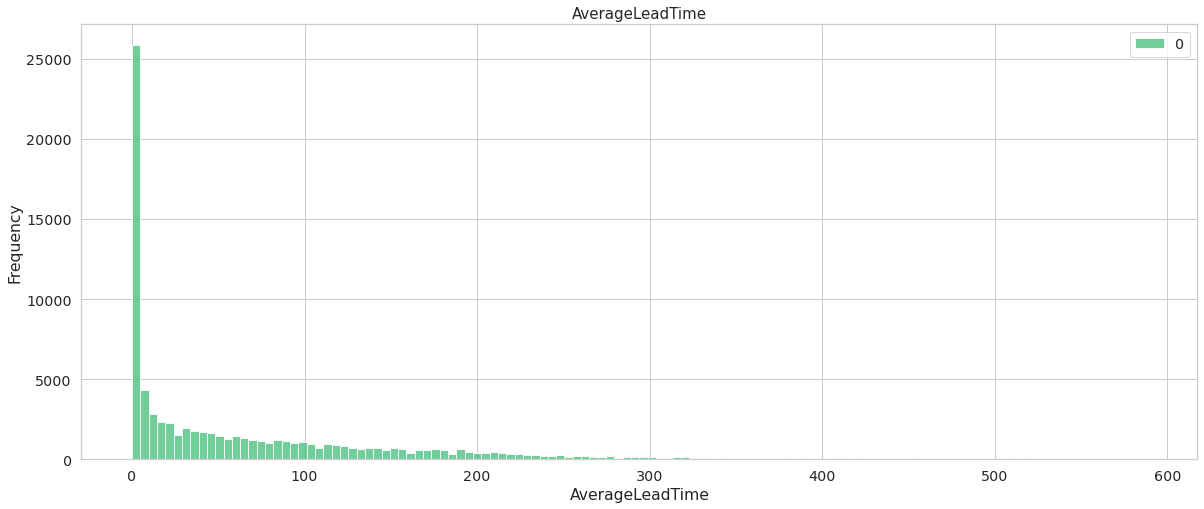

In [168]:
plt.figure(figsize = (20,8))
sns.set_style('whitegrid')
sns.histplot(data = df, x="AverageLeadTime", fill = True, color = '#41be78',palette = 'flare' )
plt.title('AverageLeadTime', fontsize = 15)
plt.xlabel('AverageLeadTime')
plt.legend(labels = [0,1,2,3])
plt.ylabel('Frequency')
plt.show()

See the effect of the label column on each feature

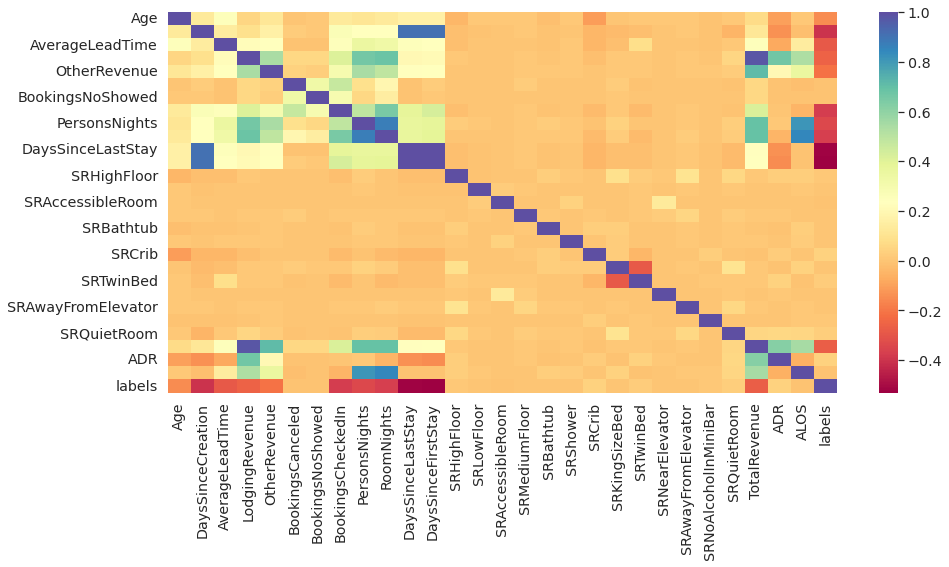

In [169]:
correlation = df.corr().round(2)
plt.figure(figsize = (15,7))
sns.heatmap(correlation, annot = None, cmap = 'Spectral')
plt.show()

In [170]:
df[labels == 0]

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,ADR,ALOS,labels
0,51.0,150,45,371.00,105.3,1,0,3,8,5,...,0,0,0,0,0,0,476.30,74.200000,1.666667,0
2119,44.0,1033,14,130.00,48.0,0,0,2,6,3,...,1,0,0,0,0,0,178.00,43.333333,1.500000,0
2195,30.0,1032,18,53.00,14.0,0,1,1,2,1,...,0,1,0,0,0,0,67.00,53.000000,1.000000,0
21300,42.0,711,16,295.00,35.0,0,0,2,5,5,...,0,0,0,0,0,0,330.00,59.000000,2.500000,0
21501,43.0,707,6,2567.00,487.1,0,0,2,26,13,...,0,0,0,0,0,0,3054.10,197.461538,6.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57951,53.0,215,135,636.00,309.0,0,0,1,8,4,...,0,1,0,0,0,0,945.00,159.000000,4.000000,0
57955,48.0,215,90,803.76,174.0,0,0,1,14,7,...,0,0,0,0,0,0,977.76,114.822857,7.000000,0
58004,55.0,214,93,1448.40,323.1,0,0,1,16,8,...,0,0,0,0,0,0,1771.50,181.050000,8.000000,0
58012,49.0,214,109,1176.00,363.5,0,0,1,12,6,...,0,0,0,0,0,0,1539.50,196.000000,6.000000,0


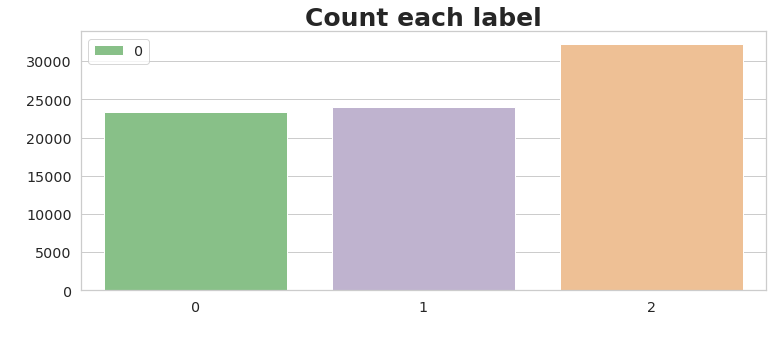

In [171]:
plt.figure(figsize = (11,5))
sns.set_style('whitegrid')

ax = sns.countplot(x='labels', dodge=False, data=df, palette="Accent")
ax.set_title('Count each label', fontsize=25, fontweight='bold')
ax.set_xlabel('Label', fontsize=15, color='white')
ax.set_ylabel('count', fontsize=15, color='white')
ax.legend(labels = [0,1,2,3])
plt.tight_layout()
plt.show()